In [1]:
# data management
import numpy as np                   # for linear algebra
import pandas as pd                  # for tabular data manipulation and processing
import category_encoders             # for categorical encoding

# machine learning
import sklearn                       # for data prep and classical ML

# data visualization and graphics
import matplotlib.pyplot as plt      # for visualization fundamentals
import seaborn as sns                # for pretty visualizations
sns.set_palette("magma")

# misc
import math                          # for calculation  
import sys                           # for system manipulation
import os                            # for file manipulation

# stats
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.proportion import proportion_confint

In [2]:
# Load Dataset

file_path = "/Users/Sebastiano/data/Clinical_MRI.xlsx"
db = pd.read_excel(file_path)
pd.set_option('display.max_columns', None)

print("N° of patients: {}".format(len(db)))
print("N° of columns: {}".format(db.shape[1]))
db.head()

N° of patients: 27
N° of columns: 969


,Patient,Date of Birth,Gender,Education,Disease duration (months),Age,SLEDAI-2k (at the time of NP event),PGA (at the time of fMRI),SLICC-DI (at the time of NP event),anti-dsDNA Titre (0=absent; 1=present) ),anti-dsDNA Titre (insert NV here <7 ),Anti-Ro-SSA,Anti-La-SSB,Anti-RNP,anti-Sm,C3 (mgdl),C4 (mgdl),aPL syndrome,LAC,aCL IgG,aCL IgM,aB2GPI IgG,aB2GPI IgM,aPL+,No Treatment,Antiplatelet,Anticoagulant,Prednisone (mg equivalent),Antimalarial,Immunosuppressant,Biologic,AnAb,Anti-Rib-P,Anti-DWEYS,NP-SLE,Event,Livedo reticularis,Cutaneous vasculitis,Hypertension,Hyperlipidaemia,current Smoking,ever smoking,Scale factor,SNR,White Matter (WM) volume cm3,White Matter (WM) volume %,Normal Appearing White Matter volume cm3,Normal Appearing White Matter volume %,Abnormal Appearing White Matter volume cm3,Abnormal Appearing White Matter volume %,Grey Matter (GM) volume cm3,Grey Matter (GM) volume %,Subcortical Grey Matter volume cm3,Subcortical Grey Matter volume %,Cortical Grey Matter volume cm3,Cortical Grey Matter volume %,Cerebellar Grey Matter volume cm3,Cerebellar Grey Matter volume %,Cerebro Spinal Fluid (CSF) volume cm3,Cerebro Spinal Fluid (CSF) volume %,Brain (WM+GM) volume cm3,Brain (WM+GM) volume %,Intracranial Cavity (IC) volume cm3,Intracranial Cavity (IC) volume %,Cerebrum total volume cm3,Cerebrum total volume %,Cerebrum right volume cm3,Cerebrum right volume %,Cerebrum left volume cm3,Cerebrum left volume %,Cerebrum volume asymmetry,Cerebrum WM total volume cm3,Cerebrum WM total volume %,Cerebrum WM right volume cm3,Cerebrum WM right volume %,Cerebrum WM left volume cm3,Cerebrum WM left volume %,Cerebrum WM volume asymmetry,Cerebrum GM total volume cm3,Cerebrum GM total volume %,Cerebrum GM right volume cm3,Cerebrum GM right volume %,Cerebrum GM left volume cm3,Cerebrum GM left volume %,Cerebrum GM volume asymmetry,Cerebellum total volume cm3,Cerebellum total volume %,Cerebellum right volume cm3,Cerebellum right volume %,Cerebellum left volume cm3,Cerebellum left volume %,Cerebellum volume asymmetry,Cerebellum WM total volume cm3,Cerebellum WM total volume %,Cerebellum WM right volume cm3,Cerebellum WM right volume %,Cerebellum WM left volume cm3,Cerebellum WM left volume %,Cerebellum WM volume asymmetry,Cerebellum GM total volume cm3,Cerebellum GM total volume %,Cerebellum GM right volume cm3,Cerebellum GM right volume %,Cerebellum GM left volume cm3,Cerebellum GM left volume %,Cerebellum GM volume asymmetry,Vermis volume cm3,Vermis volume %,Brainstem volume cm3,Brainstem volume %,Accumbens total volume cm3,Accumbens total volume %,Accumbens right volume cm3,Accumbens right volume %,Accumbens left volume cm3,Accumbens left volume %,Accumbens volume asymmetry,Amygdala total volume cm3,Amygdala total volume %,Amygdala right volume cm3,Amygdala right volume %,Amygdala left volume cm3,Amygdala left volume %,Amygdala volume asymmetry,Basal Forebrain total volume cm3,Basal Forebrain total volume %,Basal Forebrain right volume cm3,Basal Forebrain right volume %,Basal Forebrain left volume cm3,Basal Forebrain left volume %,Basal Forebrain volume asymmetry,Caudate total volume cm3,Caudate total volume %,Caudate right volume cm3,Caudate right volume %,Caudate left volume cm3,Caudate left volume %,Caudate volume asymmetry,Hippocampus total volume cm3,Hippocampus total volume %,Hippocampus right volume cm3,Hippocampus right volume %,Hippocampus left volume cm3,Hippocampus left volume %,Hippocampus volume asymmetry,Pallidum total volume cm3,Pallidum total volume %,Pallidum right volume cm3,Pallidum right volume %,Pallidum left volume cm3,Pallidum left volume %,Pallidum volume asymmetry,Putamen total volume cm3,Putamen total volume %,Putamen right volume cm3,Putamen right volume %,Putamen left volume cm3,Putamen left volume %,Putamen volume asymmetry,Thalamus total volume cm3,Thalamus total volume %,Thalamus right volume cm3,Thalamus right volume %,Thalamus left volume cm3,Thalamus left volume %,Thalamus volume asymmetry,Ventral DC

## Stats for age, gender and disease duration


In [3]:
# calculate statistics for age
age_mean = db['Age'].mean()
age_std = db['Age'].std()
age_min = db['Age'].min()
age_max = db['Age'].max()
# calculate statistics for gender
gender_counts = db['Gender'].value_counts()
male_count = gender_counts[1]
female_count = gender_counts[0]
# calculate statistics for disease duration
disease_dur_mean = db['Disease duration (months)'].mean()
disease_dur_std = db['Disease duration (months)'].std()
disease_dur_min = db['Disease duration (months)'].min()
disease_dur_max = db['Disease duration (months)'].max()
# print out the results
print('Age Mean:', age_mean)
print('Age Std:', age_std)
print('Age Min:', age_min)
print('Age Max:', age_max)
print('Male Count:', male_count)
print('Female Count:', female_count)
print('Disease Duration Mean:', disease_dur_mean)
print('Disease Duration Std:', disease_dur_std)
print('Disease Duration Min:', disease_dur_min)
print('Disease Duration Max:', disease_dur_max)

Age Mean: 43.31195473259259
Age Std: 11.922392821938722
Age Min: 21.0
Age Max: 63.0
Male Count: 3
Female Count: 24
Disease Duration Mean: 94.75148148148149
Disease Duration Std: 94.64025837566751
Disease Duration Min: 1.2
Disease Duration Max: 406.6


## Descriptive Statistics of numeric columns (clinical)

In [4]:
db.iloc[:, :42].describe(include="number")

,Date of Birth,Gender,Disease duration (months),Age,SLEDAI-2k (at the time of NP event),PGA (at the time of fMRI),SLICC-DI (at the time of NP event),anti-dsDNA Titre (0=absent; 1=present) ),anti-dsDNA Titre (insert NV here <7 ),Anti-Ro-SSA,Anti-La-SSB,Anti-RNP,anti-Sm,C3 (mgdl),C4 (mgdl),aPL syndrome,LAC,aCL IgG,aCL IgM,aB2GPI IgG,aB2GPI IgM,aPL+,No Treatment,Prednisone (mg equivalent),AnAb,Anti-Rib-P,Anti-DWEYS,NP-SLE,Livedo reticularis,Cutaneous vasculitis,Hypertension,Hyperlipidaemia,current Smoking,ever smoking
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,27827.777778,0.111111,94.751481,43.311955,8.296296,1.044444,0.962963,0.851852,44.466667,0.481481,0.074074,0.296296,0.296296,85.333333,12.888889,0.148148,0.444444,0.296296,0.222222,0.222222,0.111111,0.555556,0.037037,10.556296,0.666667,0.259259,0.333333,0.518519,0.037037,0.333333,0.370370,0.222222,0.185185,0.333333
std,4370.823618,0.320256,94.640258,11.922393,9.126524,0.855900,1.400041,0.362014,89.319453,0.509175,0.266880,0.465322,0.465322,22.620617,5.625036,0.362014,0.506370,0.465322,0.423659,0.423659,0.320256,0.506370,0.192450,10.007614,0.480384,0.446576,0.480384,0.509175,0.192450,0.480384,0.492103,0.423659,0.395847,0.480384
min,20794.000000,0.000000,1.200000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,31.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24186.500000,0.000000,30.750000,32.626389,2.000000,0.300000,0.000000,1.000000,2.800000,0.000000,0.000000,0.000000,0.000000,70.500000,9.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27750.000000,0.000000,64.500000,43.000000,4.000000,1.000000,0.000000,1.000000,16.000000,0.000000,0.000000,0.000000,0.000000,89.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,7.500000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,31833.000000,0.000000,112.950000,53.500000,13.000000,1.650000,1.000000,1.000000,39.200000,1.000000,0.000000,1.000000,1.000000,96.500000,16.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,13.900000,1.000000,0.500000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,35824.000000,1.000000,406.600000,63.000000,35.000000,2.700000,5.000000,1.000000,416.000000,1.000000,1.000000,1.000000,1.000000,128.000000,25.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,37.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Descriptive Statitistics based on NP-SLE and others

In [3]:
# NP-SLE
db.iloc[:,6:65].groupby(['NP-SLE']).describe()

SLEDAI-2k (at the time of NP event)                                  \
                                     count       mean       std  min   25%   
NP-SLE                                                                       
0                                     13.0   5.923077  9.420382  0.0  2.00   
1                                     14.0  10.500000  8.591140  0.0  3.25   

                        PGA (at the time of fMRI)                           \
        50%   75%   max                     count      mean       std  min   
NP-SLE                                                                       
0       2.0   6.0  35.0                      13.0  0.807692  0.787889  0.0   
1       9.0  14.0  28.0                      14.0  1.264286  0.885444  0.0   

                              SLICC-DI (at the time of NP event)            \
          25%   50%  75%  max                              count      mean   
NP-SLE                                                                       
0       0.200  0.50  1.0  2.3                               13.0  0.461538   
1       0.825  1.25  1.9  2.7                               14.0  1.428571   

                                            \
             std  min  25%  50%   75%  max   
NP-SLE                                       
0       0.776250  0.0  0.0  0.0  1.00  2.0   
1       1.696797  0.0  0.0  1.0  1.75  5.0   

       anti-dsDNA Titre  (0=absent; 1=present) )                           \
                                           count      mean       std  min   
NP-SLE                                                                      
0                                           13.0  0.846154  0.375534  0.0   
1                                           14.0  0.857143  0.363137  0.0   

                           anti-dsDNA Titre  (insert NV here <7 )             \
        25%  50%  75%  max                                  count       mean   
NP-SLE                                                                         
0       1.0  1.0  1.0  1.0                                   13.0  34.569231   
1       1.0  1.0  1.0  1.0                                   14.0  53.657143   

                                                   Anti-Ro-SSA            \
               std  min   25%    50%    75%    max       count      mean   
NP-SLE                                                                     
0        68.825509  0.0  1.40   4.00  35.00  248.7        13.0  0.461538   
1       106.744733  1.9  5.15  22.75  46.15  416.0        14.0  0.500000   

                                          Anti-La-SSB                      \
             std  min  25%  50%  75%  max       count      mean       std   
NP-SLE                                                                      
0       0.518875  0.0  0.0  0.0  1.0  1.0        13.0  0.076923  0.277350   
1       0.518875  0.0  0.0  0.5  1.0  1.0        14.0  0.071429  0.267261   

                                Anti-RNP                                     \
        min  25%  50%  75%  max    count      mean       std  min  25%  50%   
NP-SLE                                                                        
0       0.0  0.0  0.0  0.0  1.0     13.0  0.384615  0.506370  0.0  0.0  0.0   
1       0.0  0.0  0.0  0.0  1.0     14.0  0.214286  0.425815  0.0  0.0  0.0   

                 anti-Sm                                                \
        75%  max   count      mean       std  min  25%  50%   75%  max   
NP-SLE                                                                   
0       1.0  1.0    13.0  0.307692  0.480384  0.0  0.0  0.0  1.00  1.0   
1       0.0  1.0    14.0  0.285714  0.468807  0.0  0.0  0.0  0.75  1.0   

       C3 (mgdl)                                                        \
           count       mean        std   min   25%   50%    75%    max   
NP-SLE                                                                   
0           13.0  85.692308  27.469330  31.0  64.0  89.0  97

In [15]:
import scipy.stats as stats

# Subset the DataFrame for NP-SLE 1 and NP-SLE 0 groups
np_sle1 = db[db['NP-SLE'] == 1]['SLICC-DI (at the time of NP event)']
np_sle0 = db[db['NP-SLE'] == 0]['SLICC-DI (at the time of NP event)']

# Perform an independent two-sample t-test
t_statistic, p_value = stats.ttest_ind(np_sle1, np_sle0)

# Print the results
print(f"t-statistic: {t_statistic:.2f}")
print(f"p-value: {p_value:.5f}")

t-statistic: 1.88
p-value: 0.07202


In [22]:
import scipy.stats as stats

# Subset the DataFrame for NP-SLE 1 and NP-SLE 0 groups
np_sle1 = db[db['NP-SLE'] == 1]['ever smoking']
np_sle0 = db[db['NP-SLE'] == 0]['ever smoking']

# Perform an independent two-sample t-test
t_statistic, p_value = stats.ttest_ind(np_sle1, np_sle0)

# Print the results
print(f"t-statistic: {t_statistic:.2f}")
print(f"p-value: {p_value:.5f}")

t-statistic: 1.07
p-value: 0.29391


In [ ]:
# AnAb
db.iloc[:,6:65].groupby(['AnAb ']).describe()

In [ ]:
# aPL Syndrome
db.iloc[:,6:65].groupby(['aPL syndrome']).describe()

In [ ]:
#smoking
db.iloc[:,6:65].groupby(['ever smoking']).describe()

## Data Cleaning

In [3]:
# Drop unwanted columns

df = db.drop(['Patient','Date of Birth', 'Gender', 'Education', 'Age'], axis = 'columns')
# drop columns that include "%" in their name
#cols_to_drop = [col for col in df.columns if "%" in col]
#df = df.drop(columns=cols_to_drop)
print("Effective features to consider: {} ".format(len(df.columns)-1))

Effective features to consider: 963 


In [5]:
# Calculate the percentage of missing values in each column
missing_perc = (df.isnull().sum() / len(df)) * 100

# Calculate the percentage of unique values in each column
unique_perc = (df.nunique() / len(df)) * 100

# Calculate the skewness of each column
skewness = df.skew()

# Print the results
print('Column Noisiness:')
print('-------------------')
print('Missing values:')
print(missing_perc)
print('Unique values:')
print(unique_perc)
print('-------------------')
print('Type of noise:')
print('-------------------')
print('Skewness:')
print(skewness)

Column Noisiness:
-------------------
Missing values:
Disease duration (months)                    0.0
SLEDAI-2k (at the time of NP event)          0.0
PGA (at the time of fMRI)                    0.0
SLICC-DI (at the time of NP event)           0.0
anti-dsDNA Titre  (0=absent; 1=present) )    0.0
                                            ... 
PO right thickness mm                        0.0
PO right thickness norm.                     0.0
PO left thickness mm                         0.0
PO left thickness norm.                      0.0
PO thickness asymmetry                       0.0
Length: 964, dtype: float64
Unique values:
Disease duration (months)                    100.000000
SLEDAI-2k (at the time of NP event)           55.555556
PGA (at the time of fMRI)                     59.259259
SLICC-DI (at the time of NP event)            18.518519
anti-dsDNA Titre  (0=absent; 1=present) )      7.407407
                                                ...    
PO right thickness mm       

/var/folders/gv/8pp24fhj55x0_14187vq2lkh0000gp/T/ipykernel_21674/2226106056.py:8: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  skewness = df.skew()


In [6]:
## transform columns with high skewness.


# Identify columns with high skewness
#high_skew_cols = skewness[abs(skewness) > 1].index.tolist()
#print('-------------------')
#print('High skewness columns:')
#print(high_skew_cols)

# Apply log transformation to high skewness columns
#for col in high_skew_cols:
    #df[col] = np.log1p(df[col])

In [4]:
# One Hot Encoding for Scores, Antiplatelets and Coagulants, Therapy, NP Event

from sklearn.preprocessing import OneHotEncoder

categ = ['Antiplatelet', 'Anticoagulant', 'Antimalarial', 'Immunosuppressant', 'Biologic', 'Event']
ohe = OneHotEncoder(categories='auto',sparse=False)
df_enc = ohe.fit_transform(df[categ])
df_enc = pd.DataFrame(df_enc,columns=ohe.get_feature_names_out(categ))
df = pd.concat([df, df_enc], axis=1)
df = df.drop(categ, axis=1)
df.tail()

/opt/homebrew/Caskroom/miniforge/base/envs/lupus/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Disease duration (months),SLEDAI-2k (at the time of NP event),PGA (at the time of fMRI),SLICC-DI (at the time of NP event),anti-dsDNA Titre (0=absent; 1=present) ),anti-dsDNA Titre (insert NV here <7 ),Anti-Ro-SSA,Anti-La-SSB,Anti-RNP,anti-Sm,C3 (mgdl),C4 (mgdl),aPL syndrome,LAC,aCL IgG,aCL IgM,aB2GPI IgG,aB2GPI IgM,aPL+,No Treatment,Prednisone (mg equivalent),AnAb,Anti-Rib-P,Anti-DWEYS,NP-SLE,Livedo reticularis,Cutaneous vasculitis,Hypertension,Hyperlipidaemia,current Smoking,ever smoking,Scale factor,SNR,White Matter (WM) volume cm3,White Matter (WM) volume %,Normal Appearing White Matter volume cm3,Normal Appearing White Matter volume %,Abnormal Appearing White Matter volume cm3,Abnormal Appearing White Matter volume %,Grey Matter (GM) volume cm3,Grey Matter (GM) volume %,Subcortical Grey Matter volume cm3,Subcortical Grey Matter volume %,Cortical Grey Matter volume cm3,Cortical Grey Matter volume %,Cerebellar Grey Matter volume cm3,Cerebellar Grey Matter volume %,Cerebro Spinal Fluid (CSF) volume cm3,Cerebro Spinal Fluid (CSF) volume %,Brain (WM+GM) volume cm3,Brain (WM+GM) volume %,Intracranial Cavity (IC) volume cm3,Intracranial Cavity (IC) volume %,Cerebrum total volume cm3,Cerebrum total volume %,Cerebrum right volume cm3,Cerebrum right volume %,Cerebrum left volume cm3,Cerebrum left volume %,Cerebrum volume asymmetry,Cerebrum WM total volume cm3,Cerebrum WM total volume %,Cerebrum WM right volume cm3,Cerebrum WM right volume %,Cerebrum WM left volume cm3,Cerebrum WM left volume %,Cerebrum WM volume asymmetry,Cerebrum GM total volume cm3,Cerebrum GM total volume %,Cerebrum GM right volume cm3,Cerebrum GM right volume %,Cerebrum GM left volume cm3,Cerebrum GM left volume %,Cerebrum GM volume asymmetry,Cerebellum total volume cm3,Cerebellum total volume %,Cerebellum right volume cm3,Cerebellum right volume %,Cerebellum left volume cm3,Cerebellum left volume %,Cerebellum volume asymmetry,Cerebellum WM total volume cm3,Cerebellum WM total volume %,Cerebellum WM right volume cm3,Cerebellum WM right volume %,Cerebellum WM left volume cm3,Cerebellum WM left volume %,Cerebellum WM volume asymmetry,Cerebellum GM total volume cm3,Cerebellum GM total volume %,Cerebellum GM right volume cm3,Cerebellum GM right volume %,Cerebellum GM left volume cm3,Cerebellum GM left volume %,Cerebellum GM volume asymmetry,Vermis volume cm3,Vermis volume %,Brainstem volume cm3,Brainstem volume %,Accumbens total volume cm3,Accumbens total volume %,Accumbens right volume cm3,Accumbens right volume %,Accumbens left volume cm3,Accumbens left volume %,Accumbens volume asymmetry,Amygdala total volume cm3,Amygdala total volume %,Amygdala right volume cm3,Amygdala right volume %,Amygdala left volume cm3,Amygdala left volume %,Amygdala volume asymmetry,Basal Forebrain total volume cm3,Basal Forebrain total volume %,Basal Forebrain right volume cm3,Basal Forebrain right volume %,Basal Forebrain left volume cm3,Basal Forebrain left volume %,Basal Forebrain volume asymmetry,Caudate total volume cm3,Caudate total volume %,Caudate right volume cm3,Caudate right volume %,Caudate left volume cm3,Caudate left volume %,Caudate volume asymmetry,Hippocampus total volume cm3,Hippocampus total volume %,Hippocampus right volume cm3,Hippocampus right volume %,Hippocampus left volume cm3,Hippocampus left volume %,Hippocampus volume asymmetry,Pallidum total volume cm3,Pallidum total volume %,Pallidum right volume cm3,Pallidum right volume %,Pallidum left volume cm3,Pallidum left volume %,Pallidum volume asymmetry,Putamen total volume cm3,Putamen total volume %,Putamen right volume cm3,Putamen right volume %,Putamen left volume cm3,Putamen left volume %,Putamen volume asymmetry,Thalamus total volume cm3,Thalamus total volume %,Thalamus right volume cm3,Thalamus right volume %,Thalamus left volume cm3,Thalamus left volume %,Thalamus volume asymmetry,Ventral DC total volume cm3,Ventral DC total volume %,Ventral DC right volume cm3,Ventral DC right volume %,Ventral DC left vo

## Correlation Analysis

In [ ]:
# Calculate Pearson correlation coefficient
pearson_corr = df.corr(method='pearson')
top_pearson_corr = pearson_corr.abs().nlargest(21, df.columns).iloc[:]
print ("Top 20 Pearson correlation coefficients:")
print (top_pearson_corr)

In [ ]:
# Calculate Spearman correlation coefficient
spearman_corr = df.corr(method= 'spearman' )
top_spearman_corr = spearman_corr.abs().nlargest(21, df.columns).iloc[:39]
print ("Top 20 Spearman correlation coefficients:")
print (top_spearman_corr)

In [ ]:
from scipy.stats import kendalltau

# Example data
x = [1, 2, 3, 4, 5]
y = [1, 3, 2, 4, 5]

# Calculate Kendall's tau
tau, p_value = kendalltau(x, y)

# Print the results
print("Kendall's tau:", tau)
print("p-value:", p_value)

In [ ]:
# Computes feature correlation
df_corr = df.corr(method="spearman")

# Select the row of the correlation matrix corresponding to 'result'
pearson_corr = df_corr.loc['NP-SLE',"SNR":"PO thickness asymmetry"]

# Sort the correlations in descending order
pearson_corr = pearson_corr.sort_values(ascending=False)

# Select the top 10 correlated variables
top_10_corr = pearson_corr.iloc[1:11]

# Plot the top 10 correlations using a barplot
sns.set_style("whitegrid")
plt.figure(figsize=(30,5))
ax = sns.barplot(x=top_10_corr.index, y=top_10_corr.values)
plt.title('Top 10 MRI variables correlated with np event')
plt.xlabel('MRI & Clinical variables')
plt.ylabel('Spearman correlation coefficient')
plt.show()

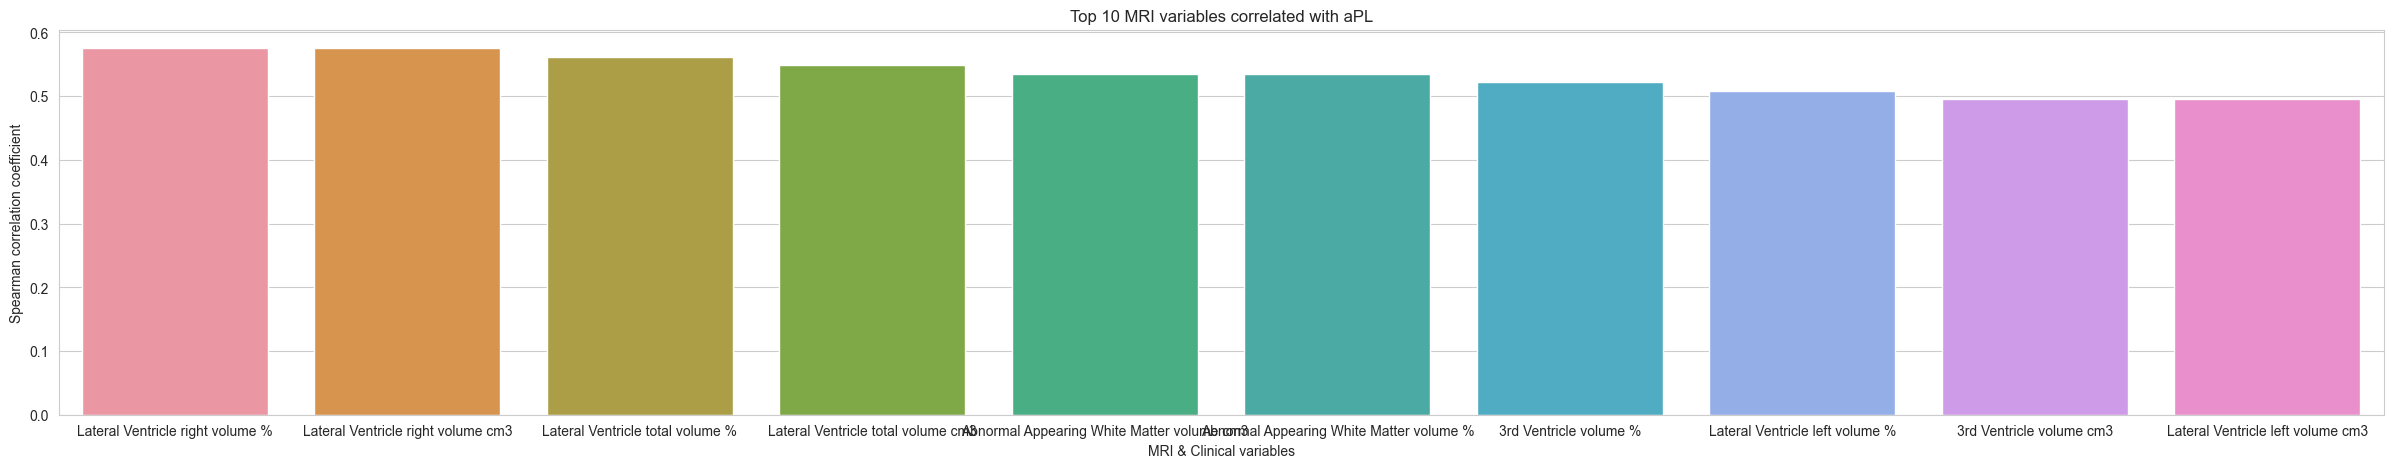

In [10]:
# Computes feature correlation
df_corr = df.corr(method="spearman")

# Select the row of the correlation matrix corresponding to 'result'
pearson_corr = df_corr.loc['aPL syndrome',"SNR":"PO thickness asymmetry"]

# Sort the correlations in descending order
pearson_corr = pearson_corr.sort_values(ascending=False)

# Select the top 10 correlated variables
top_10_corr = pearson_corr.iloc[1:11]

# Plot the top 10 correlations using a barplot
sns.set_style("whitegrid")
plt.figure(figsize=(30,5))
ax = sns.barplot(x=top_10_corr.index, y=top_10_corr.values)
plt.title('Top 10 MRI variables correlated with aPL')
plt.xlabel('MRI & Clinical variables')
plt.ylabel('Spearman correlation coefficient')
plt.show()

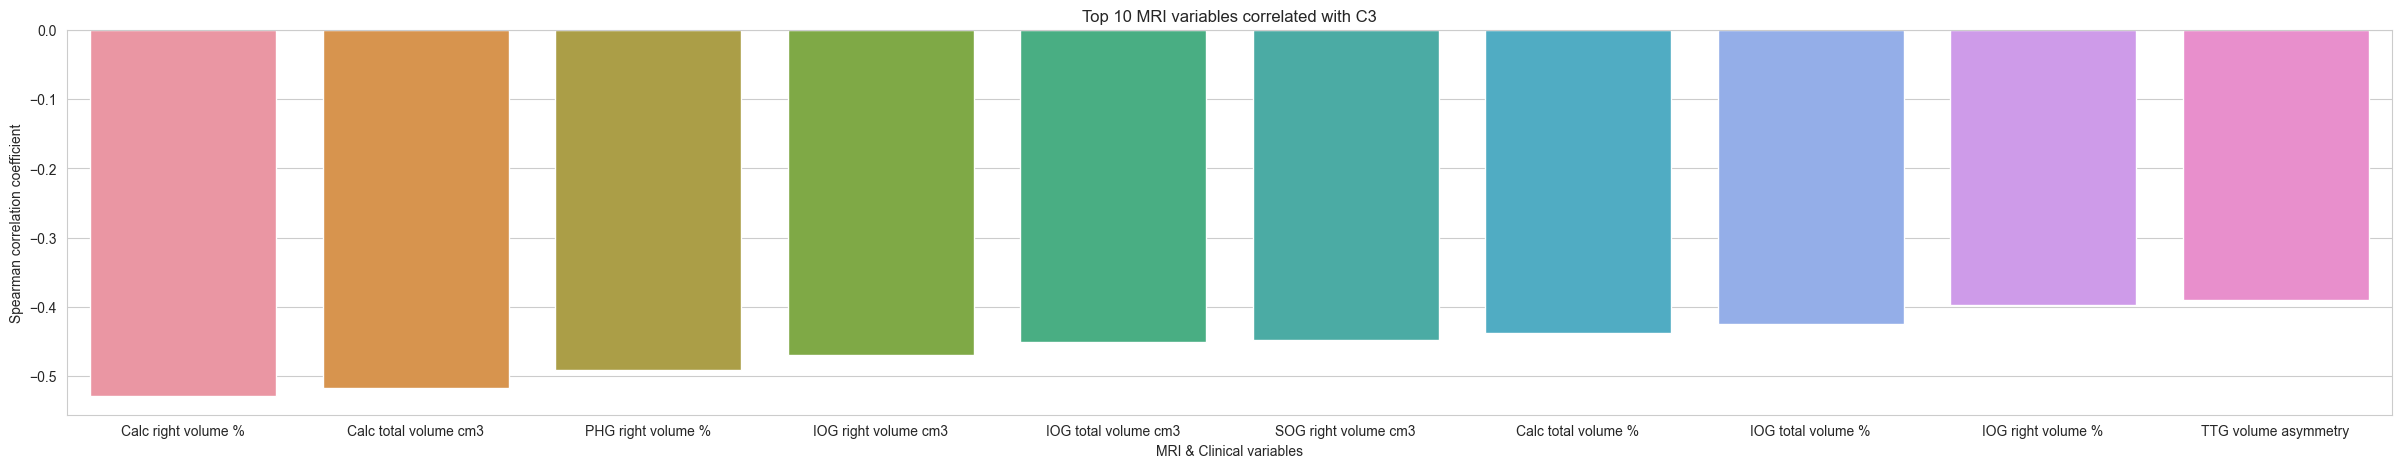

In [8]:
# Computes feature correlation
df_corr = df.corr(method="spearman")

# Select the row of the correlation matrix corresponding to 'result'
pearson_corr = df_corr.loc['C3 (mgdl)',"SNR":"PO thickness asymmetry"]

# Sort the correlations in descending order
pearson_corr = pearson_corr.sort_values()

# Select the top 10 correlated variables
top_10_corr = pearson_corr.iloc[1:11]

# Plot the top 10 correlations using a barplot
sns.set_style("whitegrid")
plt.figure(figsize=(30,5))
ax = sns.barplot(x=top_10_corr.index, y=top_10_corr.values)
plt.title('Top 10 MRI variables correlated with C3')
plt.xlabel('MRI & Clinical variables')
plt.ylabel('Spearman correlation coefficient')
plt.show()

## Check for Normality and Homogeneity

In [21]:
from scipy.stats import shapiro, levene
# Select the numeric columns
numeric_cols = df.iloc[:, :61].select_dtypes(include=['float64', 'int64']).columns.tolist()
# Shapiro-Wilk test for normality
for col in numeric_cols:
    stat, p = shapiro(df[col])
    alpha = 0.05
    if p > alpha:
        print(f"{col}: sample looks Gaussian (fail to reject H0)")
    else:
        print(f"{col}: sample does not look Gaussian (reject H0)")

# Levene's test for homogeneity of variances
group1 = df[df['NP-SLE'] == 0]['Disease duration (months)']
group2 = df[df['NP-SLE'] == 1]['Disease duration (months)']
stat, p = levene(group1, group2)
alpha = 0.05
if p > alpha:
    print("The variances of the two groups are homogeneous (fail to reject H0)")
else:
    print("The variances of the two groups are not homogeneous (reject H0)")


Disease duration (months): sample does not look Gaussian (reject H0)
SLEDAI-2k (at the time of NP event): sample does not look Gaussian (reject H0)
PGA (at the time of fMRI): sample does not look Gaussian (reject H0)
SLICC-DI (at the time of NP event): sample does not look Gaussian (reject H0)
anti-dsDNA Titre  (0=absent; 1=present) ): sample does not look Gaussian (reject H0)
anti-dsDNA Titre  (insert NV here <7 ): sample does not look Gaussian (reject H0)
Anti-Ro-SSA: sample does not look Gaussian (reject H0)
Anti-La-SSB: sample does not look Gaussian (reject H0)
Anti-RNP: sample does not look Gaussian (reject H0)
anti-Sm: sample does not look Gaussian (reject H0)
C3 (mgdl): sample looks Gaussian (fail to reject H0)
C4 (mgdl): sample looks Gaussian (fail to reject H0)
aPL syndrome: sample does not look Gaussian (reject H0)
LAC: sample does not look Gaussian (reject H0)
aCL IgG: sample does not look Gaussian (reject H0)
aCL IgM: sample does not look Gaussian (reject H0)
aB2GPI IgG: sa

# Non-Parametric Tests

## Welch’s t-test (t-test equivalent for unequal variance)

In [20]:
# Perform a Welch's t-test
NP = df.query('NP-SLE == 1')['Abnormal Appearing White Matter volume cm3']
N_NP = df.query('NP-SLE == 0')['Abnormal Appearing White Matter volume cm3']
t_stat, p_val = stats.ttest_ind(NP, N_NP, equal_var=False)

# Print the results
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_val:.4f}")

# Interpret the results
if p_val < 0.05:
    print("There is a significant difference between the means of the two groups.")
else:
    print("There is no significant difference between the means of the two groups.")

t-statistic: 0.7999
p-value: 0.4313
There is no significant difference between the means of the two groups.


In [21]:
# Define the columns to test
columns_to_test = df.columns[:55]

# Create an empty dataframe to store the t-test results
#t_test_results = pd.DataFrame(columns=['Variable', 'T-statistic', 'p-value'])

relevant_columns = []

## Iterate over the columns
for column in columns_to_test:
    # Check if the column contains only numeric data
    if np.issubdtype(df[column].dtype, np.number):
        # Select the data for the two groups
        group1 = df[df['NP-SLE'] == 0][column]
        group2 = df[df['NP-SLE'] == 1][column]

        # Perform a Welch's t-test
        t_stat, p_val = stats.ttest_ind(group1, group2, equal_var=False)

        # Print the results
        # Check if the p-value is below the significance level
        if p_val < 0.05:
            # Add the column to the list of relevant columns
            relevant_columns.append(column)
            print(f"Column: {column}, T-statistic: {t_stat:.3f}, p-value: {p_val:.5f}")
            
# Print the final list of relevant columns
print(f"Statistically significant: {relevant_columns}")

Column: aPL syndrome, T-statistic: -2.280, p-value: 0.04009
Column: AnAb , T-statistic: -2.279, p-value: 0.03305
Column: Anti-Rib-P, T-statistic: -2.235, p-value: 0.03682
Column: NP-SLE, T-statistic: -inf, p-value: 0.00000
Statistically significant: ['aPL syndrome', 'AnAb ', 'Anti-Rib-P', 'NP-SLE']


/var/folders/gv/8pp24fhj55x0_14187vq2lkh0000gp/T/ipykernel_8192/226067957.py:18: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_stat, p_val = stats.ttest_ind(group1, group2, equal_var=False)


## Wilcoxon rank-sum test to compare continuous variables among groups

Wilcoxon rank-sum test results:
Statistic: 3.8146448263914623
P-value: 0.0001363789376650375


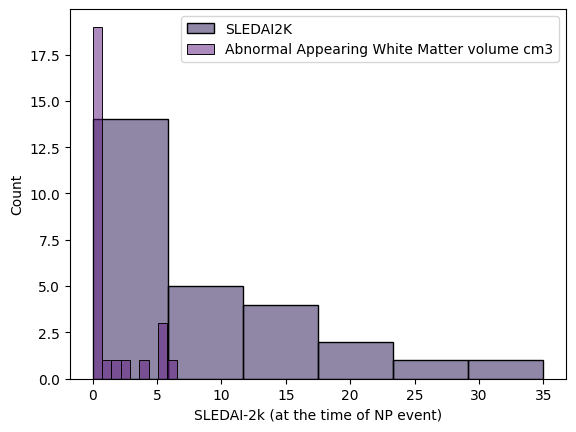

In [5]:
from scipy.stats import ranksums

# Choose the two variables for the test
var1 = df['SLEDAI-2k (at the time of NP event)']
var2 = df['Abnormal Appearing White Matter volume cm3']

# Perform the Wilcoxon rank-sum test
statistic, pvalue = ranksums(var1, var2)

# Print the test results
print("Wilcoxon rank-sum test results:")
print(f"Statistic: {statistic}")
print(f"P-value: {pvalue}")

# Plot the distribution of the two variables
sns.histplot(df, x ="SLEDAI-2k (at the time of NP event)", label="SLEDAI2K", alpha = 0.5)
sns.histplot(df, x ="Abnormal Appearing White Matter volume cm3", label = "Abnormal Appearing White Matter volume cm3", alpha = 0.5)
plt.legend()
plt.show()

Event_nan: p-value = 0.0000
Amygdala right volume %: p-value = 0.0369
OpIFG total volume cm3: p-value = 0.0226
OpIFG total volume %: p-value = 0.0290
OpIFG left volume cm3: p-value = 0.0174
OpIFG left volume %: p-value = 0.0290
MFG total volume %: p-value = 0.0226
SMC left volume %: p-value = 0.0415
SMC volume asymmetry: p-value = 0.0088
PT left volume %: p-value = 0.0415
TTG right volume cm3: p-value = 0.0174
TTG right volume %: p-value = 0.0174
Parietal right volume cm3: p-value = 0.0369
Parietal right volume %: p-value = 0.0415
Parietal volume asymmetry: p-value = 0.0466
Occipital total volume %: p-value = 0.0290
Occipital left volume %: p-value = 0.0198
Calc total volume cm3: p-value = 0.0226
Calc left volume cm3: p-value = 0.0256
IOG left volume %: p-value = 0.0101
OCP total volume cm3: p-value = 0.0369
OCP total volume %: p-value = 0.0226
OCP right volume %: p-value = 0.0415
OCP left volume %: p-value = 0.0415
ACgG volume asymmetry: p-value = 0.0327
CO total volume cm3: p-value =

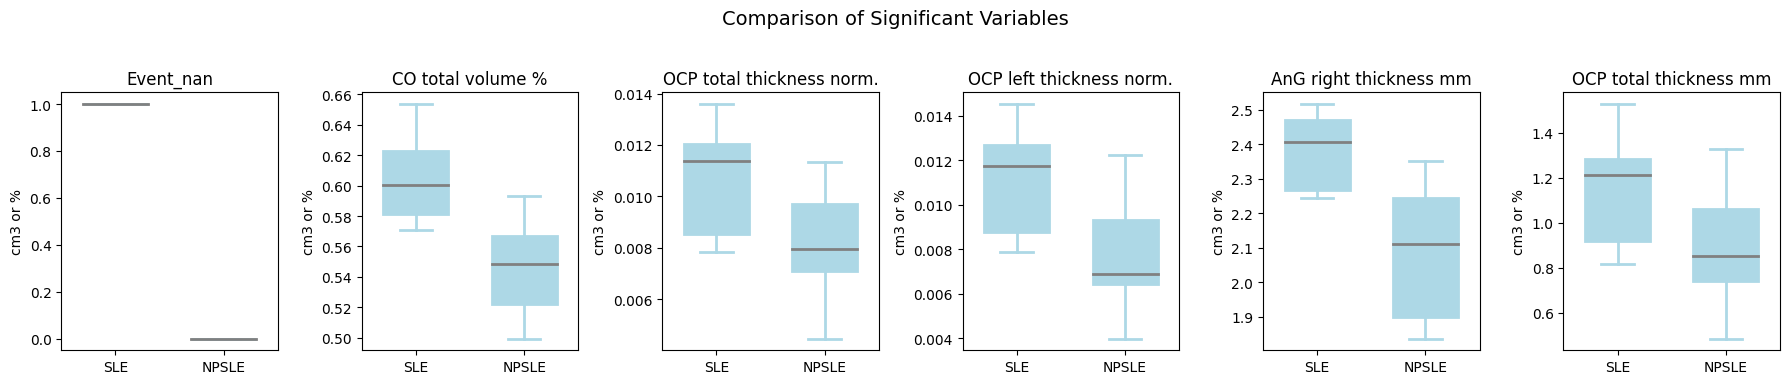

In [20]:
# Define the columns of interest
neuro_scores_cols = [
'Event_CVA',
'Event_Mood abnormalities (depressive)',
'Event_Mood abnormalities (mixed)',
'Event_Movement Disorder',
'Event_Psychosis',
'Event_Seizure',
'Event_Seizure, ACS, myelitis, CVA',
'Event_nan'
]
prednisone_col = 'Prednisone  (mg equivalent)' # Fixed the variable name
antibodies_cols = ['AnAb ','aPL+', 'anti-dsDNA Titre  (insert NV here <7 )', 'Anti-Ro-SSA', 'Anti-La-SSB', 'Anti-RNP','anti-Sm','Anti-Rib-P', 'Anti-DWEYS']
risk_factors_cols = list(df.columns [35:42]) # Convert to list
sledai_col = 'SLEDAI-2k (at the time of NP event)'
brain_region_cols = list(df.columns [44:937]) # Convert to list
# Define the arous to compare
group1 = df[df['NP-SLE'] == 0]
group2 = df[df['NP-SLE'] == 1]
# Perform the Wilcoxon rank-sum test for all continuous variables among groups
significant_vars = []
p_values = []
# Fixed the loop condition and added brain region cols
for col in neuro_scores_cols + [prednisone_col] + antibodies_cols + risk_factors_cols + [sledai_col] + brain_region_cols:
                   pval = ranksums(group1[col], group2[col])[1]
                   if pval < 0.05:
                    significant_vars.append(col)
                    p_values.append(pval)
                    print(f"{col}: p-value = {pval:.4f}")
# Sort the significant variables by p-value
sorted_vars = [x for _, x in sorted(zip (p_values, significant_vars))]

# Create a figure with subplots
fig, axs = plt.subplots(1, 6, figsize=(18, 4))

# Customize boxplot aesthetics
boxplot_props = dict(
    patch_artist=True,
    boxprops=dict(linewidth=2, edgecolor='lightblue', facecolor='lightblue'),
    medianprops=dict(linewidth=2, color='gray'),
    whiskerprops=dict(linewidth=2, color='lightblue'),
    capprops=dict(linewidth=2, color='lightblue')
)

# Plot each significant variable with larger boxes and colors
for i, col in enumerate(sorted_vars[:6]):
    bp = axs[i].boxplot([group1[col], group2[col]], labels=['SLE', 'NPSLE'], showfliers=False, **boxplot_props, widths=0.6)
    
    # Set custom colors for the boxes
    for box in bp['boxes']:
        box.set(facecolor='lightblue')

    axs[i].set_title(col, fontsize=12)
    axs[i].set_ylabel("cm3 or %", fontsize=10)
    axs[i].tick_params(axis='both', which='both', labelsize=10)
    #axs[i].set_ylim([-5, 100])  # Adjust the y-axis limits as needed

# Add a common title for the entire figure
fig.suptitle("Comparison of Significant Variables", fontsize=14)

# Adjust the spacing between subplots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Save the figure with higher resolution
plt.savefig('/Users/Sebastiano/SLE/results/Wilcoxon.png', dpi=600, bbox_inches='tight')

# Show the modified plot
plt.show()
plt.close(fig)




Prednisone  (mg equivalent): p-value = 0.0025
anti-dsDNA Titre  (insert NV here <7 ): p-value = 0.0281
TrIFG left volume cm3: p-value = 0.0359
TrIFG left volume %: p-value = 0.0097
Calc total volume %: p-value = 0.0404
Calc right volume %: p-value = 0.0084
MOG right volume %: p-value = 0.0281
MCgG volume asymmetry: p-value = 0.0147
Insular right volume %: p-value = 0.0318
AIns total volume %: p-value = 0.0454
AIns left volume %: p-value = 0.0168
Inf. Lateral Ventricle total volume cm3: p-value = 0.0192
Inf. Lateral Ventricle total volume %: p-value = 0.0128
Inf. Lateral Ventricle right volume cm3: p-value = 0.0318
Inf. Lateral Ventricle right volume %: p-value = 0.0281
IOG thickness asymmetry: p-value = 0.0218
PHG total thickness mm: p-value = 0.0073
PHG total thickness norm.: p-value = 0.0063
PHG right thickness mm: p-value = 0.0097
PHG right thickness norm.: p-value = 0.0097
PHG left thickness mm: p-value = 0.0192
PHG left thickness norm.: p-value = 0.0218


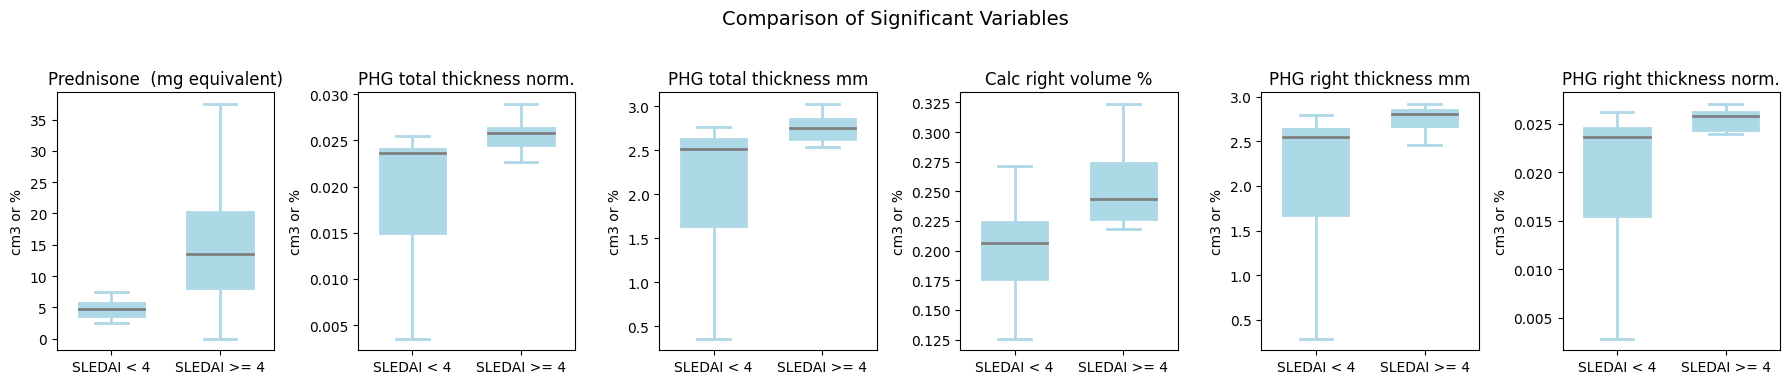

In [22]:
import matplotlib.pyplot as plt
from scipy.stats import ranksums

# Define the columns of interest
neuro_scores_cols = [
    'Event_CVA',
    'Event_Mood abnormalities (depressive)',
    'Event_Mood abnormalities (mixed)',
    'Event_Movement Disorder',
    'Event_Psychosis',
    'Event_Seizure',
    'Event_Seizure, ACS, myelitis, CVA',
    'Event_nan'
]
prednisone_col = 'Prednisone  (mg equivalent)'  # Fixed the variable name
antibodies_cols = ['AnAb ','aPL+', 'anti-dsDNA Titre  (insert NV here <7 )', 'Anti-Ro-SSA', 'Anti-La-SSB', 'Anti-RNP','anti-Sm','Anti-Rib-P', 'Anti-DWEYS']
risk_factors_cols = list(df.columns[35:42])  # Convert to list
slicc_col = 'SLICC-DI (at the time of NP event)'
sledai_col = 'SLEDAI-2k (at the time of NP event)'
brain_region_cols = list(df.columns[44:937])  # Convert to list

# Assign groups based on SLEDAI-2k score
group1 = df[df[sledai_col] < 4]
group2 = df[df[sledai_col] >= 4]

# Perform the Wilcoxon rank-sum test for all continuous variables among groups
significant_vars = []
p_values = []

# Fixed the loop condition and added brain region cols
for col in neuro_scores_cols + [prednisone_col] + antibodies_cols + risk_factors_cols + [slicc_col] + brain_region_cols:
    pval = ranksums(group1[col], group2[col])[1]
    if pval < 0.05:
        significant_vars.append(col)
        p_values.append(pval)
        print(f"{col}: p-value = {pval:.4f}")

# Sort the significant variables by p-value
sorted_vars = [x for _, x in sorted(zip(p_values, significant_vars))]

#  Create a figure with subplots
fig, axs = plt.subplots(1, 6, figsize=(18, 4))

# Customize boxplot aesthetics
boxplot_props = dict(
    patch_artist=True,
    boxprops=dict(linewidth=2, edgecolor='lightblue', facecolor='lightblue'),
    medianprops=dict(linewidth=2, color='gray'),
    whiskerprops=dict(linewidth=2, color='lightblue'),
    capprops=dict(linewidth=2, color='lightblue')
)

# Plot each significant variable with larger boxes and colors
for i, col in enumerate(sorted_vars[:6]):
    bp = axs[i].boxplot([group1[col], group2[col]], labels=['SLEDAI < 4', 'SLEDAI >= 4'], showfliers=False, **boxplot_props, widths=0.6)
    
    # Set custom colors for the boxes
    for box in bp['boxes']:
        box.set(facecolor='lightblue')

    axs[i].set_title(col, fontsize=12)
    axs[i].set_ylabel("cm3 or %", fontsize=10)
    axs[i].tick_params(axis='both', which='both', labelsize=10)
    #axs[i].set_ylim([-5, 100])  # Adjust the y-axis limits as needed

# Add a common title for the entire figure
fig.suptitle("Comparison of Significant Variables", fontsize=14)

# Adjust the spacing between subplots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Save the figure with higher resolution
plt.savefig('/Users/Sebastiano/SLE/results/Wilcoxon.png', dpi=600, bbox_inches='tight')

# Show the modified plot
plt.show()
plt.close(fig)


Cerebrum total volume %: p-value = 0.0198
Cerebrum right volume %: p-value = 0.0198
Cerebrum left volume %: p-value = 0.0174
Cerebrum WM total volume %: p-value = 0.0327
Cerebrum WM right volume %: p-value = 0.0369
Cerebrum WM left volume %: p-value = 0.0327
Ventral DC total volume %: p-value = 0.0198
Ventral DC right volume %: p-value = 0.0290
Ventral DC left volume %: p-value = 0.0174
GRe volume asymmetry: p-value = 0.0466
OpIFG total volume cm3: p-value = 0.0198
OpIFG total volume %: p-value = 0.0031
OpIFG right volume cm3: p-value = 0.0153
OpIFG right volume %: p-value = 0.0076
AOrG right volume cm3: p-value = 0.0369
AOrG right volume %: p-value = 0.0369
MOrG volume asymmetry: p-value = 0.0369
TMP total volume %: p-value = 0.0415
TMP left volume %: p-value = 0.0174
PoG volume asymmetry: p-value = 0.0369
MPoG total volume %: p-value = 0.0226
MPoG right volume cm3: p-value = 0.0153
MPoG right volume %: p-value = 0.0088
SMG total volume %: p-value = 0.0133
SMG right volume %: p-value 

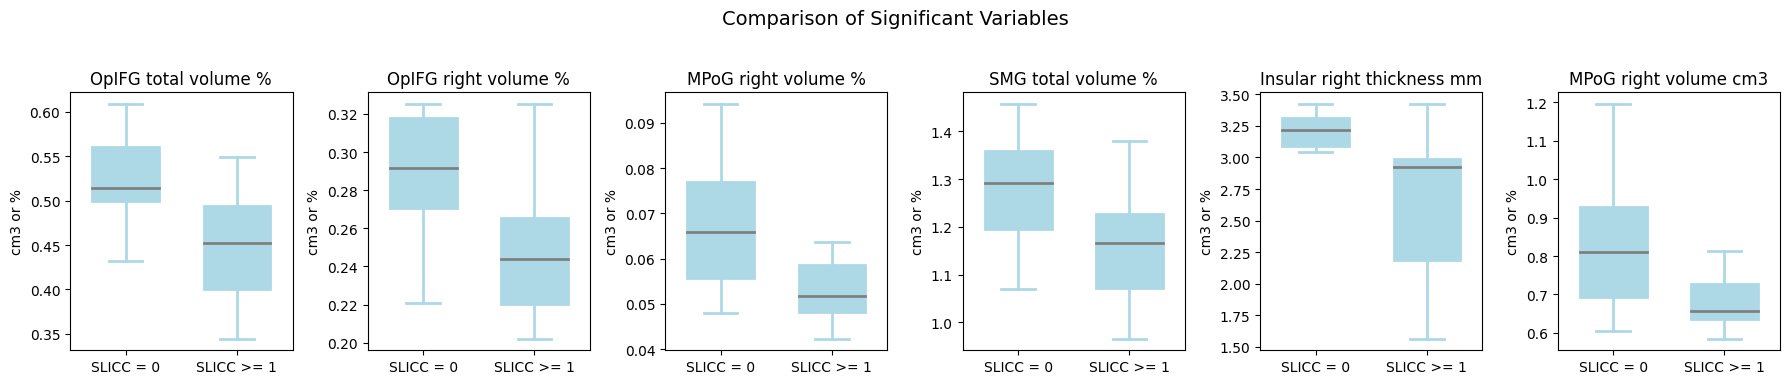

In [23]:
import matplotlib.pyplot as plt
from scipy.stats import ranksums

# Define the columns of interest
neuro_scores_cols = [
    'Event_CVA',
    'Event_Mood abnormalities (depressive)',
    'Event_Mood abnormalities (mixed)',
    'Event_Movement Disorder',
    'Event_Psychosis',
    'Event_Seizure',
    'Event_Seizure, ACS, myelitis, CVA',
    'Event_nan'
]
prednisone_col = 'Prednisone  (mg equivalent)'  # Fixed the variable name
antibodies_cols = ['AnAb ','aPL+', 'anti-dsDNA Titre  (insert NV here <7 )', 'Anti-Ro-SSA', 'Anti-La-SSB', 'Anti-RNP','anti-Sm','Anti-Rib-P', 'Anti-DWEYS']
risk_factors_cols = list(df.columns[35:42])  # Convert to list
slicc_col = 'SLICC-DI (at the time of NP event)'
sledai_col = 'SLEDAI-2k (at the time of NP event)'
brain_region_cols = list(df.columns[44:937])  # Convert to list

# Assign groups based on SLICC score
group1 = df[df[slicc_col] < 1]
group2 = df[df[slicc_col] >= 1]

# Perform the Wilcoxon rank-sum test for all continuous variables among groups
significant_vars = []
p_values = []

# Fixed the loop condition and added brain region cols
for col in neuro_scores_cols + [prednisone_col] + antibodies_cols + risk_factors_cols + [sledai_col] + brain_region_cols:
    pval = ranksums(group1[col], group2[col])[1]
    if pval < 0.05:
        significant_vars.append(col)
        p_values.append(pval)
        print(f"{col}: p-value = {pval:.4f}")

# Sort the significant variables by p-value
sorted_vars = [x for _, x in sorted(zip(p_values, significant_vars))]

#  Create a figure with subplots
fig, axs = plt.subplots(1, 6, figsize=(18, 4))

# Customize boxplot aesthetics
boxplot_props = dict(
    patch_artist=True,
    boxprops=dict(linewidth=2, edgecolor='lightblue', facecolor='lightblue'),
    medianprops=dict(linewidth=2, color='gray'),
    whiskerprops=dict(linewidth=2, color='lightblue'),
    capprops=dict(linewidth=2, color='lightblue')
)

# Plot each significant variable with larger boxes and colors
for i, col in enumerate(sorted_vars[:6]):
    bp = axs[i].boxplot([group1[col], group2[col]], labels=['SLICC = 0', 'SLICC >= 1'], showfliers=False, **boxplot_props, widths=0.6)
    
    # Set custom colors for the boxes
    for box in bp['boxes']:
        box.set(facecolor='lightblue')

    axs[i].set_title(col, fontsize=12)
    axs[i].set_ylabel("cm3 or %", fontsize=10)
    axs[i].tick_params(axis='both', which='both', labelsize=10)
    #axs[i].set_ylim([-5, 100])  # Adjust the y-axis limits as needed

# Add a common title for the entire figure
fig.suptitle("Comparison of Significant Variables", fontsize=14)

# Adjust the spacing between subplots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Save the figure with higher resolution
plt.savefig('/Users/Sebastiano/SLE/results/Wilcoxon.png', dpi=600, bbox_inches='tight')

# Show the modified plot
plt.show()
plt.close(fig)



Cerebellum right volume %: p-value = 0.0406
Brainstem volume %: p-value = 0.0203
Amygdala total volume cm3: p-value = 0.0406
Hippocampus volume asymmetry: p-value = 0.0203
TTG total volume %: p-value = 0.0203
TTG left volume %: p-value = 0.0344
AnG total volume cm3: p-value = 0.0478
AnG right volume cm3: p-value = 0.0478
Ent right volume cm3: p-value = 0.0478
Ent volume asymmetry: p-value = 0.0344
ACgG total volume cm3: p-value = 0.0478
ACgG right volume cm3: p-value = 0.0406
Insular total volume %: p-value = 0.0478
Insular right volume %: p-value = 0.0169
CO right volume %: p-value = 0.0169
PO total volume %: p-value = 0.0344
PO left volume %: p-value = 0.0406
OpIFG thickness asymmetry: p-value = 0.0169
OrIFG thickness asymmetry: p-value = 0.0290
MFG thickness asymmetry: p-value = 0.0478
LOrG thickness asymmetry: p-value = 0.0203
FuG thickness asymmetry: p-value = 0.0203
Cun right thickness mm: p-value = 0.0478
SOG total thickness norm.: p-value = 0.0406
OCP right thickness mm: p-valu

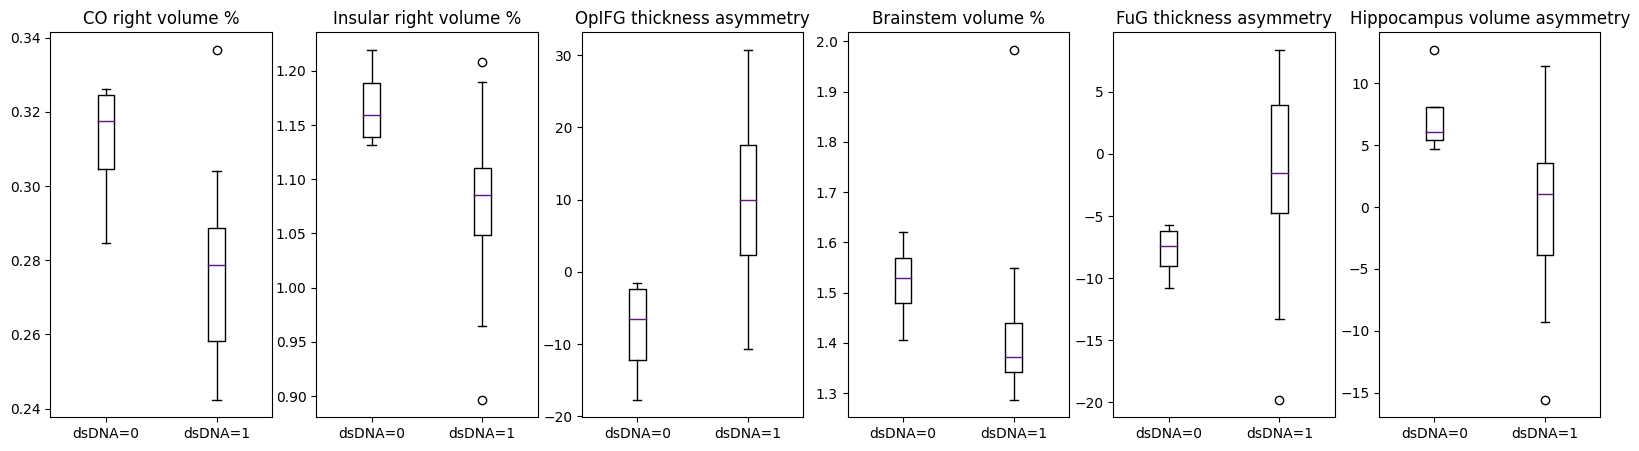

In [9]:
import matplotlib.pyplot as plt
from scipy.stats import ranksums

# Define the columns of interest
neuro_scores_cols = [
    'Event_CVA',
    'Event_Mood abnormalities (depressive)',
    'Event_Mood abnormalities (mixed)',
    'Event_Movement Disorder',
    'Event_Psychosis',
    'Event_Seizure',
    'Event_Seizure, ACS, myelitis, CVA',
    'Event_nan'
]
prednisone_col = 'Prednisone  (mg equivalent)'  # Fixed the variable name
antibodies_cols = ['AnAb ','aPL+', 'Anti-Ro-SSA', 'Anti-La-SSB', 'Anti-RNP','anti-Sm','Anti-Rib-P', 'Anti-DWEYS', ]
risk_factors_cols = list(df.columns[35:42])  # Convert to list, 
slicc_col = 'SLICC-DI (at the time of NP event)'
sledai_col = 'SLEDAI-2k (at the time of NP event)'
brain_region_cols = list(df.columns[44:937])  # Convert to list

# Assign groups based on SLEDAI-2k score
group1 = df[df['anti-dsDNA Titre  (0=absent; 1=present) )'] == 0]
group2 = df[df['anti-dsDNA Titre  (0=absent; 1=present) )'] == 1]

# Perform the Wilcoxon rank-sum test for all continuous variables among groups
significant_vars = []
p_values = []

# Fixed the loop condition and added brain region cols
for col in neuro_scores_cols + [prednisone_col] + antibodies_cols + risk_factors_cols + [slicc_col] + [sledai_col] + brain_region_cols:
    pval = ranksums(group1[col], group2[col])[1]
    if pval < 0.05:
        significant_vars.append(col)
        p_values.append(pval)
        print(f"{col}: p-value = {pval:.4f}")

# Sort the significant variables by p-value
sorted_vars = [x for _, x in sorted(zip(p_values, significant_vars))]

# Plot the five most significant variables
fig, axs = plt.subplots(1, 6, figsize=(20, 5))
for i in range(6):
    col = sorted_vars[i]
    axs[i].boxplot([group1[col], group2[col]])
    axs[i].set_xticklabels(['dsDNA=0', 'dsDNA=1'])
    axs[i].set_title(col)

# Save the figure to the results folder as a PNG file
#plt.savefig(f'/Users/Sebastiano/SLE/results/Wilcoxon.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close(fig)


Frontal volume asymmetry: p-value = 0.0019
GRe volume asymmetry: p-value = 0.0076
OrIFG left volume cm3: p-value = 0.0369
OrIFG left volume %: p-value = 0.0174
MFC total volume cm3: p-value = 0.0369
MFC total volume %: p-value = 0.0466
MFC right volume cm3: p-value = 0.0369
MFC right volume %: p-value = 0.0327
PrG volume asymmetry: p-value = 0.0466
OFuG left volume cm3: p-value = 0.0466
OFuG volume asymmetry: p-value = 0.0415
MOG total volume cm3: p-value = 0.0415
MOG right volume cm3: p-value = 0.0101
MOG right volume %: p-value = 0.0198
OpIFG thickness asymmetry: p-value = 0.0466


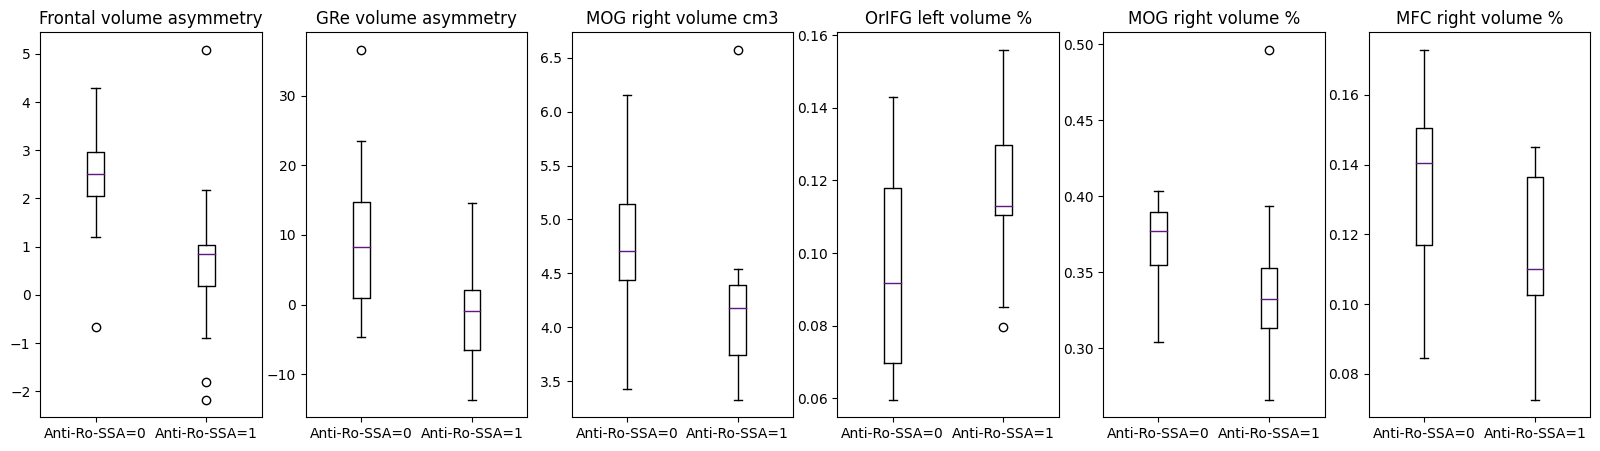

In [12]:
import matplotlib.pyplot as plt
from scipy.stats import ranksums

# Define the columns of interest
neuro_scores_cols = [
    'Event_CVA',
    'Event_Mood abnormalities (depressive)',
    'Event_Mood abnormalities (mixed)',
    'Event_Movement Disorder',
    'Event_Psychosis',
    'Event_Seizure',
    'Event_Seizure, ACS, myelitis, CVA',
    'Event_nan'
]
prednisone_col = 'Prednisone  (mg equivalent)'  # Fixed the variable name
antibodies_cols = ['AnAb ','aPL+', 'anti-dsDNA Titre  (insert NV here <7 )', 'Anti-La-SSB', 'Anti-RNP','anti-Sm','Anti-Rib-P', 'Anti-DWEYS']
risk_factors_cols = list(df.columns[35:42])  # Convert to list
slicc_col = 'SLICC-DI (at the time of NP event)'
sledai_col = 'SLEDAI-2k (at the time of NP event)'
brain_region_cols = list(df.columns[44:937])  # Convert to list

# Assign groups based on SLEDAI-2k score
group1 = df[df['Anti-Ro-SSA'] == 0]
group2 = df[df['Anti-Ro-SSA'] == 1]

# Perform the Wilcoxon rank-sum test for all continuous variables among groups
significant_vars = []
p_values = []

# Fixed the loop condition and added brain region cols
for col in neuro_scores_cols + [prednisone_col] + antibodies_cols + risk_factors_cols + [slicc_col] + [sledai_col] + brain_region_cols:
    pval = ranksums(group1[col], group2[col])[1]
    if pval < 0.05:
        significant_vars.append(col)
        p_values.append(pval)
        print(f"{col}: p-value = {pval:.4f}")

# Sort the significant variables by p-value
sorted_vars = [x for _, x in sorted(zip(p_values, significant_vars))]

# Plot the five most significant variables
fig, axs = plt.subplots(1, 6, figsize=(20, 5))
for i in range(6):
    col = sorted_vars[i]
    axs[i].boxplot([group1[col], group2[col]])
    axs[i].set_xticklabels(['Anti-Ro-SSA=0', 'Anti-Ro-SSA=1'])
    axs[i].set_title(col)

# Save the figure to the results folder as a PNG file
plt.savefig(f'/Users/Sebastiano/SLE/results/Wilcoxon.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close(fig)


Cerebrum volume asymmetry: p-value = 0.0257
Cerebrum WM volume asymmetry: p-value = 0.0195
Cerebellum WM total volume %: p-value = 0.0337
Cerebellum WM left volume %: p-value = 0.0209
Brainstem volume %: p-value = 0.0384
Basal Forebrain total volume cm3: p-value = 0.0436
Basal Forebrain right volume cm3: p-value = 0.0257
Basal Forebrain right volume %: p-value = 0.0495
Thalamus volume asymmetry: p-value = 0.0436
MOrG left volume %: p-value = 0.0436
SMC volume asymmetry: p-value = 0.0495
Temporal total volume cm3: p-value = 0.0195
Temporal right volume cm3: p-value = 0.0257
Temporal right volume %: p-value = 0.0436
Temporal left volume cm3: p-value = 0.0126
FuG total volume cm3: p-value = 0.0010
FuG total volume %: p-value = 0.0010
FuG right volume cm3: p-value = 0.0041
FuG right volume %: p-value = 0.0041
FuG left volume cm3: p-value = 0.0012
FuG left volume %: p-value = 0.0007
PT total volume cm3: p-value = 0.0495
ITG left volume cm3: p-value = 0.0195
MTG volume asymmetry: p-value = 0

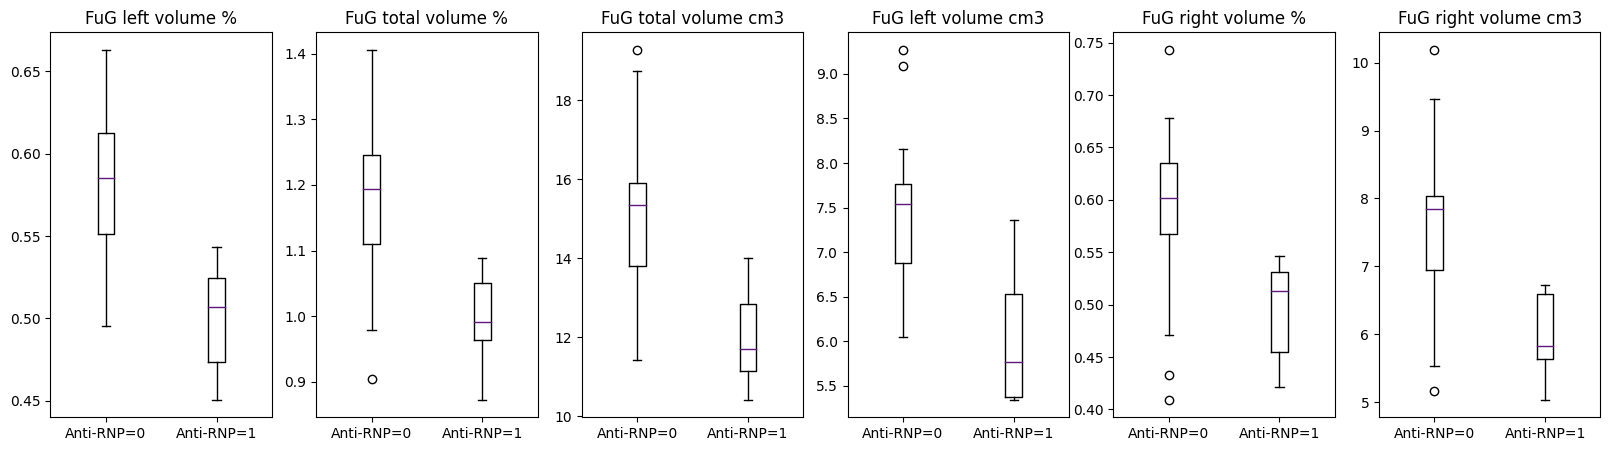

In [13]:
import matplotlib.pyplot as plt
from scipy.stats import ranksums

# Define the columns of interest
neuro_scores_cols = [
    'Event_CVA',
    'Event_Mood abnormalities (depressive)',
    'Event_Mood abnormalities (mixed)',
    'Event_Movement Disorder',
    'Event_Psychosis',
    'Event_Seizure',
    'Event_Seizure, ACS, myelitis, CVA',
    'Event_nan'
]
prednisone_col = 'Prednisone  (mg equivalent)'  # Fixed the variable name
antibodies_cols = ['AnAb ','aPL+', 'anti-dsDNA Titre  (insert NV here <7 )', 'Anti-Ro-SSA', 'Anti-La-SSB','anti-Sm','Anti-Rib-P', 'Anti-DWEYS']
risk_factors_cols = list(df.columns[35:42])  # Convert to list
slicc_col = 'SLICC-DI (at the time of NP event)'
sledai_col = 'SLEDAI-2k (at the time of NP event)'
brain_region_cols = list(df.columns[44:937])  # Convert to list

# Assign groups based on anti-rnp 
group1 = df[df['Anti-RNP'] == 0]
group2 = df[df['Anti-RNP'] == 1]

# Perform the Wilcoxon rank-sum test for all continuous variables among groups
significant_vars = []
p_values = []

# Fixed the loop condition and added brain region cols
for col in neuro_scores_cols + [prednisone_col] + antibodies_cols + risk_factors_cols + [slicc_col] + [sledai_col] + brain_region_cols:
    pval = ranksums(group1[col], group2[col])[1]
    if pval < 0.05:
        significant_vars.append(col)
        p_values.append(pval)
        print(f"{col}: p-value = {pval:.4f}")

# Sort the significant variables by p-value
sorted_vars = [x for _, x in sorted(zip(p_values, significant_vars))]

# Plot the five most significant variables
fig, axs = plt.subplots(1, 6, figsize=(20, 5))
for i in range(6):
    col = sorted_vars[i]
    axs[i].boxplot([group1[col], group2[col]])
    axs[i].set_xticklabels(['Anti-RNP=0', 'Anti-RNP=1'])
    axs[i].set_title(col)

# Save the figure to the results folder as a PNG file
plt.savefig(f'/Users/Sebastiano/SLE/results/Wilcoxon.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close(fig)


aPL+: p-value = 0.0004
Cerebellum WM total volume cm3: p-value = 0.0192
Cerebellum WM total volume %: p-value = 0.0063
Cerebellum WM right volume cm3: p-value = 0.0168
Cerebellum WM right volume %: p-value = 0.0073
Cerebellum WM left volume cm3: p-value = 0.0359
Cerebellum WM left volume %: p-value = 0.0147
Brainstem volume %: p-value = 0.0318
Thalamus total volume %: p-value = 0.0454
Thalamus left volume %: p-value = 0.0248
Thalamus volume asymmetry: p-value = 0.0359
MSFG left volume %: p-value = 0.0359
Temporal total volume %: p-value = 0.0218
Temporal right volume %: p-value = 0.0192
PP right volume %: p-value = 0.0318
ITG total volume %: p-value = 0.0147
FuG total thickness norm.: p-value = 0.0454
FuG left thickness norm.: p-value = 0.0454
PT left thickness norm.: p-value = 0.0359
TTG left thickness mm: p-value = 0.0404
TTG thickness asymmetry: p-value = 0.0454
Cun right thickness norm.: p-value = 0.0359
OFuG total thickness mm: p-value = 0.0084
OFuG total thickness norm.: p-value 

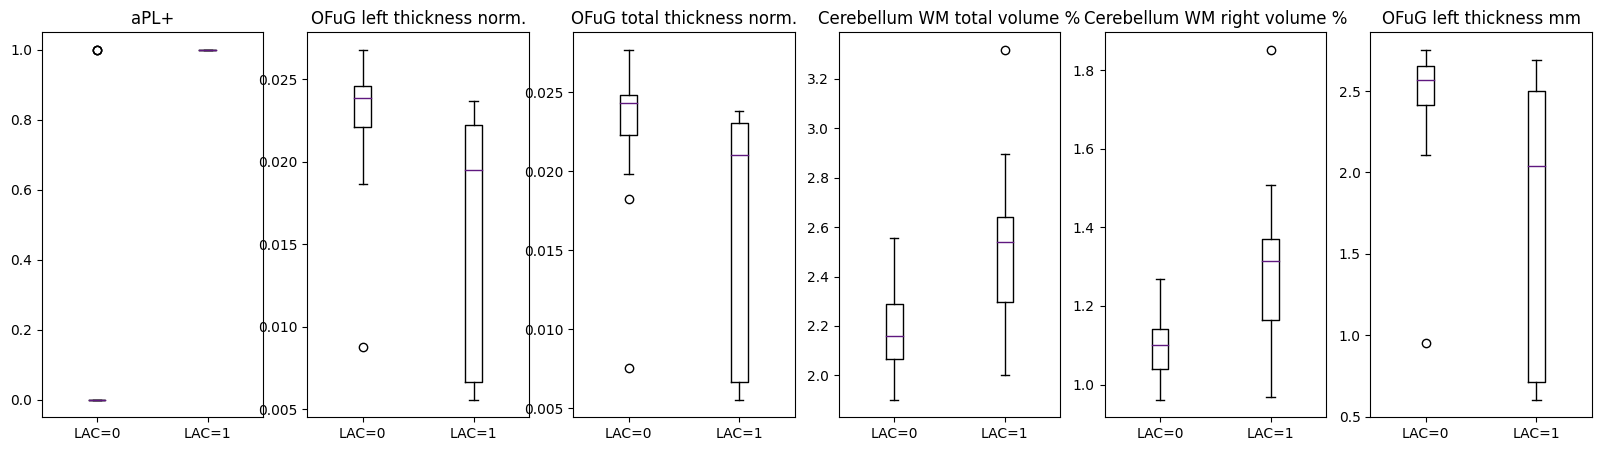

In [15]:
import matplotlib.pyplot as plt
from scipy.stats import ranksums

# Define the columns of interest
neuro_scores_cols = [
    'Event_CVA',
    'Event_Mood abnormalities (depressive)',
    'Event_Mood abnormalities (mixed)',
    'Event_Movement Disorder',
    'Event_Psychosis',
    'Event_Seizure',
    'Event_Seizure, ACS, myelitis, CVA',
    'Event_nan'
]
prednisone_col = 'Prednisone  (mg equivalent)'  # Fixed the variable name
antibodies_cols = ['AnAb ', 'anti-dsDNA Titre  (insert NV here <7 )', 'Anti-Ro-SSA', 'Anti-La-SSB', 'Anti-RNP','anti-Sm','Anti-Rib-P', 'Anti-DWEYS']
risk_factors_cols = list(df.columns[35:42])  # Convert to list
slicc_col = 'SLICC-DI (at the time of NP event)'
sledai_col = 'SLEDAI-2k (at the time of NP event)'
brain_region_cols = list(df.columns[44:937])  # Convert to list

# Assign groups based on LAC
group1 = df[df['LAC'] == 0]
group2 = df[df['LAC'] == 1]

# Perform the Wilcoxon rank-sum test for all continuous variables among groups
significant_vars = []
p_values = []

# Fixed the loop condition and added brain region cols
for col in neuro_scores_cols + [prednisone_col] + antibodies_cols + risk_factors_cols + [slicc_col] + [sledai_col] + brain_region_cols:
    pval = ranksums(group1[col], group2[col])[1]
    if pval < 0.05:
        significant_vars.append(col)
        p_values.append(pval)
        print(f"{col}: p-value = {pval:.4f}")

# Sort the significant variables by p-value
sorted_vars = [x for _, x in sorted(zip(p_values, significant_vars))]

# Plot the five most significant variables
fig, axs = plt.subplots(1, 6, figsize=(20, 5))
for i in range(6):
    col = sorted_vars[i]
    axs[i].boxplot([group1[col], group2[col]])
    axs[i].set_xticklabels(['LAC=0', 'LAC=1'])
    axs[i].set_title(col)

# Save the figure to the results folder as a PNG file
plt.savefig(f'/Users/Sebastiano/SLE/results/Wilcoxon.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close(fig)


Cerebellum total volume %: p-value = 0.0257
Cerebellum left volume %: p-value = 0.0224
Cerebellum GM left volume %: p-value = 0.0436
Basal Forebrain right volume cm3: p-value = 0.0337
Ventral DC volume asymmetry: p-value = 0.0126
MOrG total volume %: p-value = 0.0195
MOrG left volume %: p-value = 0.0169
FuG total volume cm3: p-value = 0.0295
FuG total volume %: p-value = 0.0169
FuG right volume %: p-value = 0.0436
FuG left volume cm3: p-value = 0.0146
FuG left volume %: p-value = 0.0169
MTG volume asymmetry: p-value = 0.0384
STG total volume cm3: p-value = 0.0257
STG left volume cm3: p-value = 0.0126
MPoG total volume cm3: p-value = 0.0224
MPoG left volume cm3: p-value = 0.0224
MPoG left volume %: p-value = 0.0436
LiG left volume %: p-value = 0.0068
LiG volume asymmetry: p-value = 0.0025
IOG right volume %: p-value = 0.0436
IOG volume asymmetry: p-value = 0.0195
PCgG total volume %: p-value = 0.0224
PCgG right volume %: p-value = 0.0384
Insular volume asymmetry: p-value = 0.0436
FO rig

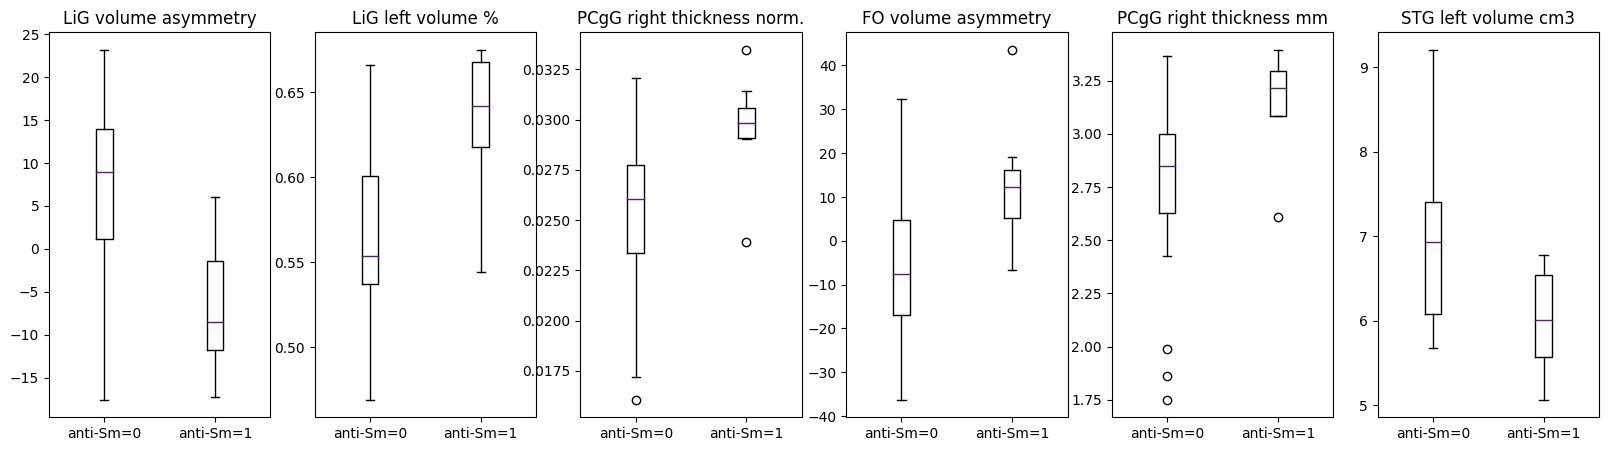

In [14]:
import matplotlib.pyplot as plt
from scipy.stats import ranksums

# Define the columns of interest
neuro_scores_cols = [
    'Event_CVA',
    'Event_Mood abnormalities (depressive)',
    'Event_Mood abnormalities (mixed)',
    'Event_Movement Disorder',
    'Event_Psychosis',
    'Event_Seizure',
    'Event_Seizure, ACS, myelitis, CVA',
    'Event_nan'
]
prednisone_col = 'Prednisone  (mg equivalent)'  # Fixed the variable name
antibodies_cols = ['AnAb ','aPL+', 'anti-dsDNA Titre  (insert NV here <7 )', 'Anti-Ro-SSA', 'Anti-La-SSB', 'Anti-RNP','Anti-Rib-P', 'Anti-DWEYS']
risk_factors_cols = list(df.columns[35:42])  # Convert to list
slicc_col = 'SLICC-DI (at the time of NP event)'
sledai_col = 'SLEDAI-2k (at the time of NP event)'
brain_region_cols = list(df.columns[44:937])  # Convert to list

# Assign groups based on anti-sm score
group1 = df[df['anti-Sm'] == 0]
group2 = df[df['anti-Sm'] == 1]

# Perform the Wilcoxon rank-sum test for all continuous variables among groups
significant_vars = []
p_values = []

# Fixed the loop condition and added brain region cols
for col in neuro_scores_cols + [prednisone_col] + antibodies_cols + risk_factors_cols + [slicc_col] + [sledai_col] + brain_region_cols:
    pval = ranksums(group1[col], group2[col])[1]
    if pval < 0.05:
        significant_vars.append(col)
        p_values.append(pval)
        print(f"{col}: p-value = {pval:.4f}")

# Sort the significant variables by p-value
sorted_vars = [x for _, x in sorted(zip(p_values, significant_vars))]

# Plot the five most significant variables
fig, axs = plt.subplots(1, 6, figsize=(20, 5))
for i in range(6):
    col = sorted_vars[i]
    axs[i].boxplot([group1[col], group2[col]])
    axs[i].set_xticklabels(['anti-Sm=0', 'anti-Sm=1'])
    axs[i].set_title(col)

# Save the figure to the results folder as a PNG file
plt.savefig(f'/Users/Sebastiano/SLE/results/Wilcoxon.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close(fig)


Cerebellum WM total volume %: p-value = 0.0454
Cerebellum WM left volume %: p-value = 0.0454
Caudate volume asymmetry: p-value = 0.0359
Thalamus left volume %: p-value = 0.0454
Thalamus volume asymmetry: p-value = 0.0128
LOrG volume asymmetry: p-value = 0.0281
Temporal total volume %: p-value = 0.0192
Temporal right volume %: p-value = 0.0248
Temporal left volume %: p-value = 0.0454
PHG volume asymmetry: p-value = 0.0112
TTG thickness asymmetry: p-value = 0.0128
SMG thickness asymmetry: p-value = 0.0359


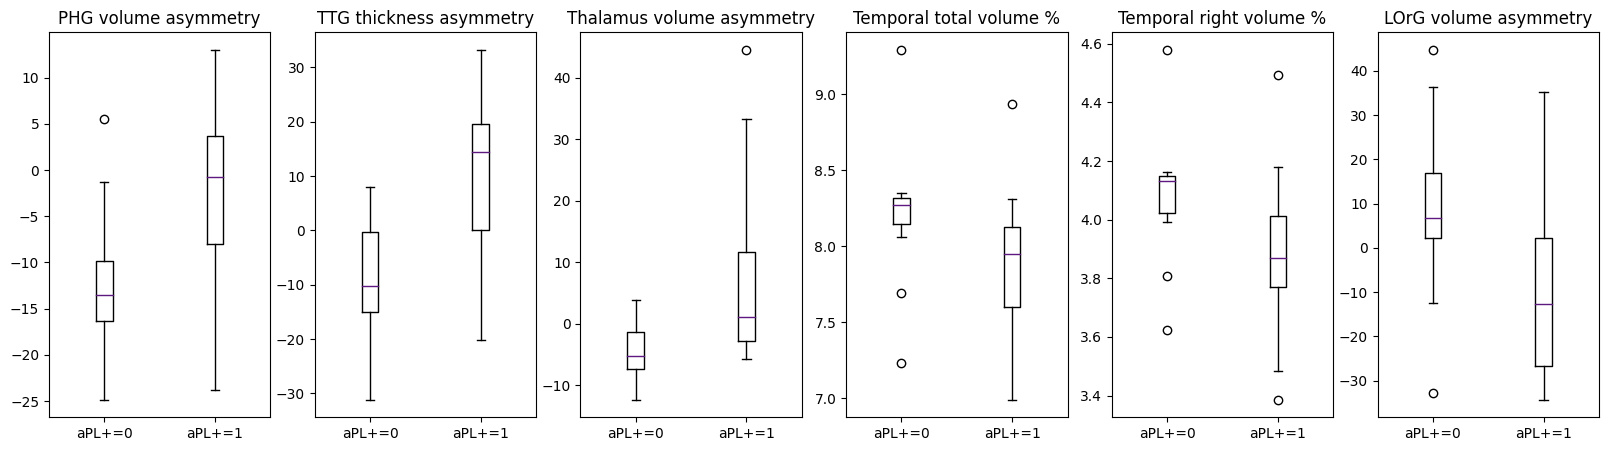

In [16]:
import matplotlib.pyplot as plt
from scipy.stats import ranksums

# Define the columns of interest
neuro_scores_cols = [
    'Event_CVA',
    'Event_Mood abnormalities (depressive)',
    'Event_Mood abnormalities (mixed)',
    'Event_Movement Disorder',
    'Event_Psychosis',
    'Event_Seizure',
    'Event_Seizure, ACS, myelitis, CVA',
    'Event_nan'
]
prednisone_col = 'Prednisone  (mg equivalent)'  # Fixed the variable name
antibodies_cols = ['AnAb ', 'anti-dsDNA Titre  (insert NV here <7 )', 'Anti-Ro-SSA', 'Anti-La-SSB', 'Anti-RNP','anti-Sm','Anti-Rib-P', 'Anti-DWEYS']
risk_factors_cols = list(df.columns[35:42])  # Convert to list
slicc_col = 'SLICC-DI (at the time of NP event)'
sledai_col = 'SLEDAI-2k (at the time of NP event)'
brain_region_cols = list(df.columns[44:937])  # Convert to list

# Assign groups based on aPL score
group1 = df[df['aPL+'] == 0]
group2 = df[df['aPL+'] == 1]

# Perform the Wilcoxon rank-sum test for all continuous variables among groups
significant_vars = []
p_values = []

# Fixed the loop condition and added brain region cols
for col in neuro_scores_cols + [prednisone_col] + antibodies_cols + risk_factors_cols + [slicc_col] + [sledai_col] + brain_region_cols:
    pval = ranksums(group1[col], group2[col])[1]
    if pval < 0.05:
        significant_vars.append(col)
        p_values.append(pval)
        print(f"{col}: p-value = {pval:.4f}")

# Sort the significant variables by p-value
sorted_vars = [x for _, x in sorted(zip(p_values, significant_vars))]

# Plot the five most significant variables
fig, axs = plt.subplots(1, 6, figsize=(20, 5))
for i in range(6):
    col = sorted_vars[i]
    axs[i].boxplot([group1[col], group2[col]])
    axs[i].set_xticklabels(['aPL+=0', 'aPL+=1'])
    axs[i].set_title(col)

# Save the figure to the results folder as a PNG file
plt.savefig(f'/Users/Sebastiano/SLE/results/Wilcoxon.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close(fig)


SLEDAI-2k (at the time of NP event): p-value = 0.0372
Cerebellar Grey Matter volume cm3: p-value = 0.0350
Cerebellum total volume cm3: p-value = 0.0180
Cerebellum right volume cm3: p-value = 0.0396
Cerebellum left volume cm3: p-value = 0.0156
Cerebellum GM total volume cm3: p-value = 0.0350
Cerebellum GM right volume cm3: p-value = 0.0396
Cerebellum GM left volume cm3: p-value = 0.0350
Vermis volume cm3: p-value = 0.0075
Vermis volume %: p-value = 0.0308
Hippocampus total volume %: p-value = 0.0449
Hippocampus left volume %: p-value = 0.0117
Hippocampus volume asymmetry: p-value = 0.0350
OpIFG left volume cm3: p-value = 0.0308
TrIFG total volume cm3: p-value = 0.0449
TrIFG right volume cm3: p-value = 0.0396
LOrG total volume cm3: p-value = 0.0350
LOrG left volume cm3: p-value = 0.0156
LOrG left volume %: p-value = 0.0270
POrG left volume cm3: p-value = 0.0308
PrG volume asymmetry: p-value = 0.0270
PoG total volume cm3: p-value = 0.0449
PoG left volume cm3: p-value = 0.0350
MOG total vo

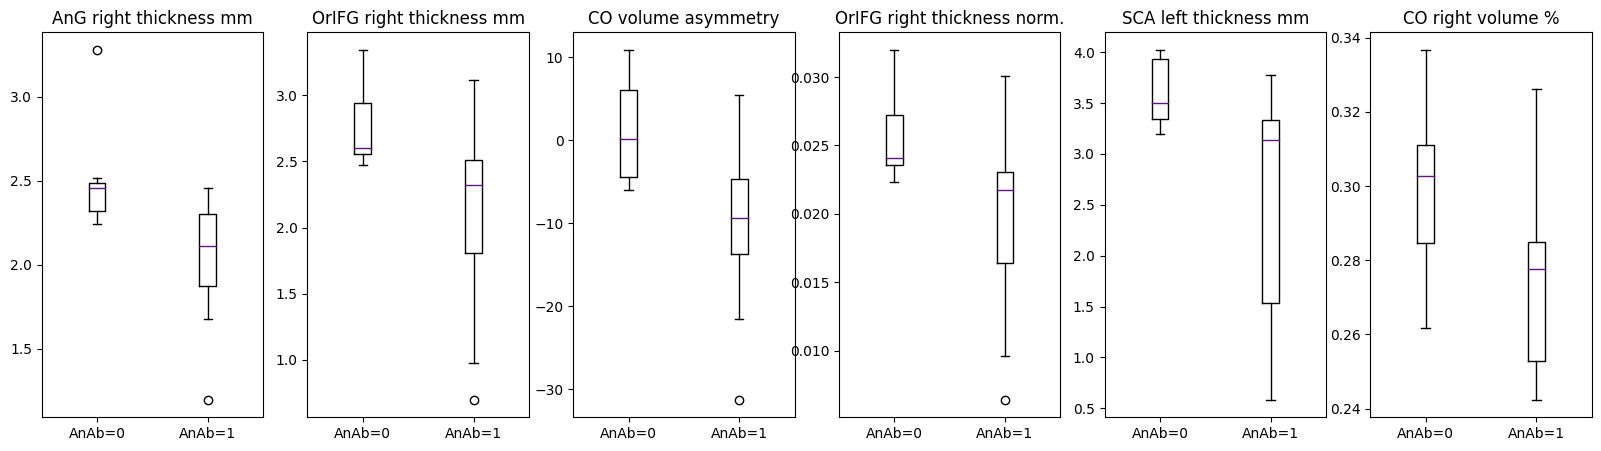

In [24]:
import matplotlib.pyplot as plt
from scipy.stats import ranksums

# Define the columns of interest
neuro_scores_cols = [
    'Event_CVA',
    'Event_Mood abnormalities (depressive)',
    'Event_Mood abnormalities (mixed)',
    'Event_Movement Disorder',
    'Event_Psychosis',
    'Event_Seizure',
    'Event_Seizure, ACS, myelitis, CVA',
    'Event_nan'
]
prednisone_col = 'Prednisone  (mg equivalent)'  # Fixed the variable name
antibodies_cols = ['aPL+', 'anti-dsDNA Titre  (insert NV here <7 )', 'Anti-Ro-SSA', 'Anti-La-SSB', 'Anti-RNP','anti-Sm','Anti-Rib-P', 'Anti-DWEYS']
risk_factors_cols = list(df.columns[35:42])  # Convert to list
slicc_col = 'SLICC-DI (at the time of NP event)'
sledai_col = 'SLEDAI-2k (at the time of NP event)'
brain_region_cols = list(df.columns[44:937])  # Convert to list

# Assign groups based on AnAb score
group1 = df[df['AnAb '] == 0]
group2 = df[df['AnAb '] == 1]

# Perform the Wilcoxon rank-sum test for all continuous variables among groups
significant_vars = []
p_values = []

# Fixed the loop condition and added brain region cols
for col in neuro_scores_cols + [prednisone_col] + antibodies_cols + risk_factors_cols + [slicc_col] + [sledai_col] + brain_region_cols:
    pval = ranksums(group1[col], group2[col])[1]
    if pval < 0.05:
        significant_vars.append(col)
        p_values.append(pval)
        print(f"{col}: p-value = {pval:.4f}")

# Sort the significant variables by p-value
sorted_vars = [x for _, x in sorted(zip(p_values, significant_vars))]

# Plot the five most significant variables
fig, axs = plt.subplots(1, 6, figsize=(20, 5))
for i in range(6):
    col = sorted_vars[i]
    axs[i].boxplot([group1[col], group2[col]])
    axs[i].set_xticklabels(['AnAb=0', 'AnAb=1'])
    axs[i].set_title(col)

# Save the figure to the results folder as a PNG file
plt.savefig(f'/Users/Sebastiano/SLE/results/Wilcoxon.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close(fig)


Cerebellar Grey Matter volume cm3: p-value = 0.0079
Cerebellum total volume cm3: p-value = 0.0309
Cerebellum right volume cm3: p-value = 0.0464
Cerebellum left volume cm3: p-value = 0.0233
Cerebellum WM volume asymmetry: p-value = 0.0269
Cerebellum GM total volume cm3: p-value = 0.0079
Cerebellum GM right volume cm3: p-value = 0.0079
Cerebellum GM left volume cm3: p-value = 0.0149
Vermis volume cm3: p-value = 0.0406
Brainstem volume %: p-value = 0.0269
Accumbens right volume cm3: p-value = 0.0233
Accumbens volume asymmetry: p-value = 0.0093
Caudate volume asymmetry: p-value = 0.0406
Hippocampus right volume %: p-value = 0.0093
Pallidum total volume cm3: p-value = 0.0464
Pallidum left volume cm3: p-value = 0.0309
Pallidum volume asymmetry: p-value = 0.0269
Putamen left volume cm3: p-value = 0.0406
OpIFG left volume cm3: p-value = 0.0067
OpIFG left volume %: p-value = 0.0269
OpIFG volume asymmetry: p-value = 0.0464
MPrG right volume %: p-value = 0.0093
MPrG volume asymmetry: p-value = 0.

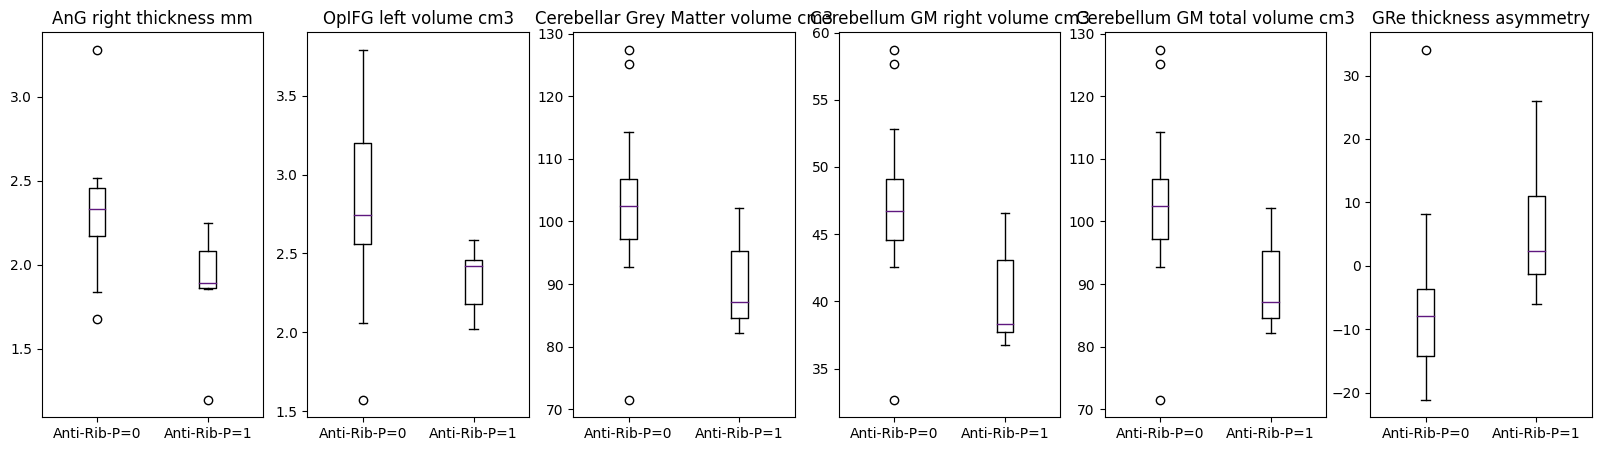

In [25]:
import matplotlib.pyplot as plt
from scipy.stats import ranksums

# Define the columns of interest
neuro_scores_cols = [
    'Event_CVA',
    'Event_Mood abnormalities (depressive)',
    'Event_Mood abnormalities (mixed)',
    'Event_Movement Disorder',
    'Event_Psychosis',
    'Event_Seizure',
    'Event_Seizure, ACS, myelitis, CVA',
    'Event_nan'
]
prednisone_col = 'Prednisone  (mg equivalent)'  # Fixed the variable name
antibodies_cols = ['AnAb ','aPL+', 'anti-dsDNA Titre  (insert NV here <7 )', 'Anti-Ro-SSA', 'Anti-La-SSB', 'Anti-RNP','anti-Sm', 'Anti-DWEYS']
risk_factors_cols = list(df.columns[35:42])  # Convert to list
slicc_col = 'SLICC-DI (at the time of NP event)'
sledai_col = 'SLEDAI-2k (at the time of NP event)'
brain_region_cols = list(df.columns[44:937])  # Convert to list

# Assign groups based on anti-Rib score
group1 = df[df['Anti-Rib-P'] == 0]
group2 = df[df['Anti-Rib-P'] == 1]

# Perform the Wilcoxon rank-sum test for all continuous variables among groups
significant_vars = []
p_values = []

# Fixed the loop condition and added brain region cols
for col in neuro_scores_cols + [prednisone_col] + antibodies_cols + risk_factors_cols + [slicc_col] + [sledai_col] + brain_region_cols:
    pval = ranksums(group1[col], group2[col])[1]
    if pval < 0.05:
        significant_vars.append(col)
        p_values.append(pval)
        print(f"{col}: p-value = {pval:.4f}")

# Sort the significant variables by p-value
sorted_vars = [x for _, x in sorted(zip(p_values, significant_vars))]

# Plot the five most significant variables
fig, axs = plt.subplots(1, 6, figsize=(20, 5))
for i in range(6):
    col = sorted_vars[i]
    axs[i].boxplot([group1[col], group2[col]])
    axs[i].set_xticklabels(['Anti-Rib-P=0', 'Anti-Rib-P=1'])
    axs[i].set_title(col)

# Save the figure to the results folder as a PNG file
plt.savefig(f'/Users/Sebastiano/SLE/results/Wilcoxon.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close(fig)


Cerebellum total volume cm3: p-value = 0.0350
Cerebellum left volume cm3: p-value = 0.0396
Amygdala total volume %: p-value = 0.0236
Amygdala right volume %: p-value = 0.0308
Amygdala left volume %: p-value = 0.0236
MFC left volume cm3: p-value = 0.0350
MPrG right volume %: p-value = 0.0101
MPrG volume asymmetry: p-value = 0.0156
SCA total volume cm3: p-value = 0.0180
SCA right volume cm3: p-value = 0.0350
SCA left volume cm3: p-value = 0.0308
SFG total volume %: p-value = 0.0449
SFG right volume %: p-value = 0.0350
SFG left volume %: p-value = 0.0236
SMC left volume %: p-value = 0.0136
SMC volume asymmetry: p-value = 0.0308
FuG left volume %: p-value = 0.0206
PCu total volume cm3: p-value = 0.0180
PCu right volume cm3: p-value = 0.0270
PCu left volume cm3: p-value = 0.0396
Occipital left volume cm3: p-value = 0.0308
LiG left volume cm3: p-value = 0.0047
LiG left volume %: p-value = 0.0396
OFuG right volume cm3: p-value = 0.0350
OCP total volume cm3: p-value = 0.0087
OCP total volume %

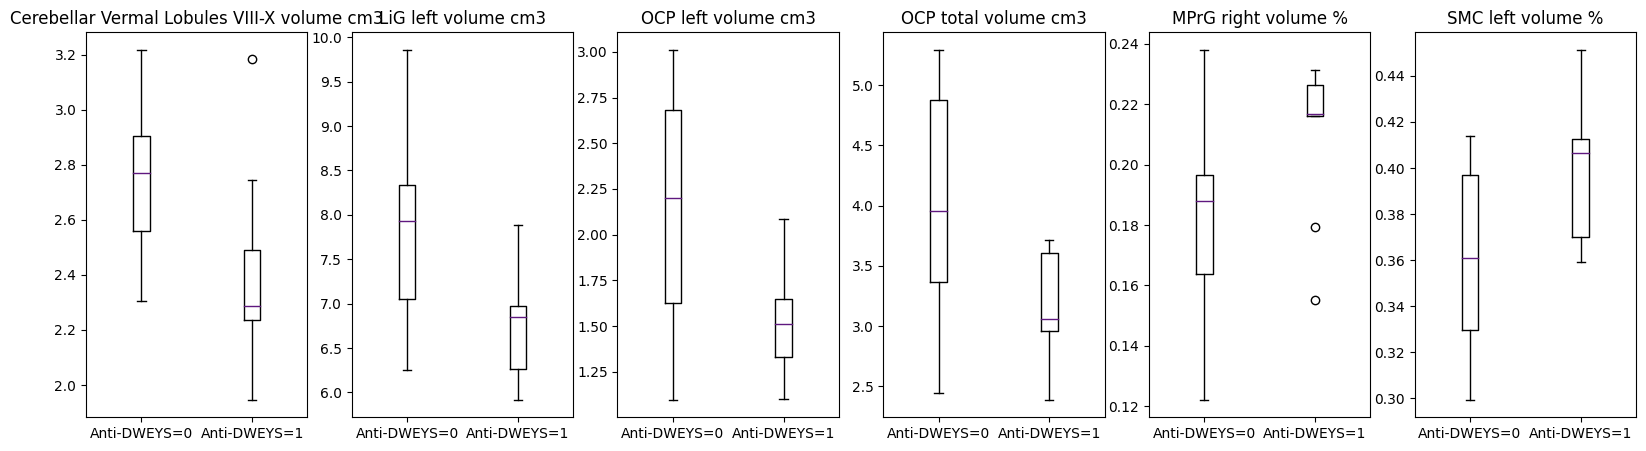

In [26]:
import matplotlib.pyplot as plt
from scipy.stats import ranksums

# Define the columns of interest
neuro_scores_cols = [
    'Event_CVA',
    'Event_Mood abnormalities (depressive)',
    'Event_Mood abnormalities (mixed)',
    'Event_Movement Disorder',
    'Event_Psychosis',
    'Event_Seizure',
    'Event_Seizure, ACS, myelitis, CVA',
    'Event_nan'
]
prednisone_col = 'Prednisone  (mg equivalent)'  # Fixed the variable name
antibodies_cols = ['AnAb ','aPL+', 'anti-dsDNA Titre  (insert NV here <7 )', 'Anti-Ro-SSA', 'Anti-La-SSB', 'Anti-RNP','anti-Sm','Anti-Rib-P']
risk_factors_cols = list(df.columns[35:42])  # Convert to list
slicc_col = 'SLICC-DI (at the time of NP event)'
sledai_col = 'SLEDAI-2k (at the time of NP event)'
brain_region_cols = list(df.columns[44:937])  # Convert to list

# Assign groups based on anti-DWEYS score
group1 = df[df['Anti-DWEYS'] == 0]
group2 = df[df['Anti-DWEYS'] == 1]

# Perform the Wilcoxon rank-sum test for all continuous variables among groups
significant_vars = []
p_values = []

# Fixed the loop condition and added brain region cols
for col in neuro_scores_cols + [prednisone_col] + antibodies_cols + risk_factors_cols + [slicc_col] + [sledai_col] + brain_region_cols:
    pval = ranksums(group1[col], group2[col])[1]
    if pval < 0.05:
        significant_vars.append(col)
        p_values.append(pval)
        print(f"{col}: p-value = {pval:.4f}")

# Sort the significant variables by p-value
sorted_vars = [x for _, x in sorted(zip(p_values, significant_vars))]

# Plot the five most significant variables
fig, axs = plt.subplots(1, 6, figsize=(20, 5))
for i in range(6):
    col = sorted_vars[i]
    axs[i].boxplot([group1[col], group2[col]])
    axs[i].set_xticklabels(['Anti-DWEYS=0', 'Anti-DWEYS=1'])
    axs[i].set_title(col)

# Save the figure to the results folder as a PNG file
plt.savefig(f'/Users/Sebastiano/SLE/results/Wilcoxon.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close(fig)


Normal Appearing White Matter volume cm3: p-value = 0.0180
Grey Matter (GM) volume cm3: p-value = 0.0034
Subcortical Grey Matter volume cm3: p-value = 0.0117
Brain (WM+GM) volume cm3: p-value = 0.0117
Intracranial Cavity (IC) volume cm3: p-value = 0.0236
Cerebrum total volume cm3: p-value = 0.0180
Cerebrum right volume cm3: p-value = 0.0156
Cerebrum left volume cm3: p-value = 0.0117
Cerebrum WM total volume cm3: p-value = 0.0206
Cerebrum WM right volume cm3: p-value = 0.0180
Cerebrum WM left volume cm3: p-value = 0.0206
Cerebrum GM total volume cm3: p-value = 0.0075
Cerebrum GM right volume cm3: p-value = 0.0087
Cerebrum GM left volume cm3: p-value = 0.0047
Cerebellum WM total volume %: p-value = 0.0308
Cerebellum WM right volume %: p-value = 0.0270
Vermis volume cm3: p-value = 0.0350
Caudate total volume cm3: p-value = 0.0308
Caudate right volume cm3: p-value = 0.0308
Caudate left volume cm3: p-value = 0.0396
Pallidum total volume cm3: p-value = 0.0308
Pallidum right volume cm3: p-val

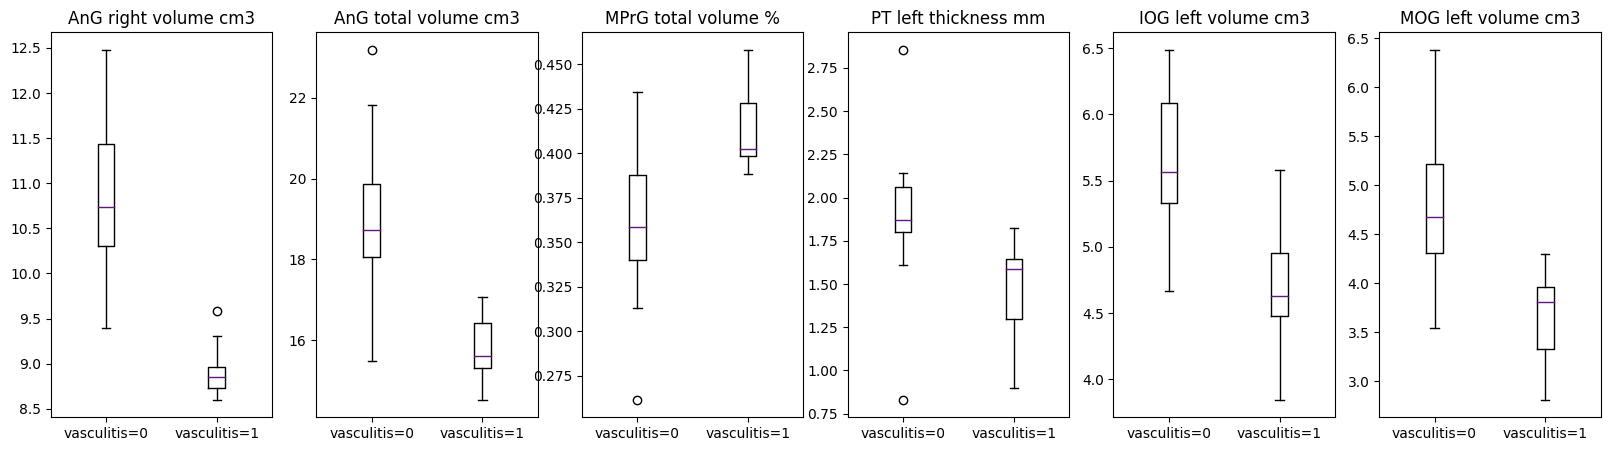

In [27]:
import matplotlib.pyplot as plt
from scipy.stats import ranksums

# Define the columns of interest
neuro_scores_cols = [
    'Event_CVA',
    'Event_Mood abnormalities (depressive)',
    'Event_Mood abnormalities (mixed)',
    'Event_Movement Disorder',
    'Event_Psychosis',
    'Event_Seizure',
    'Event_Seizure, ACS, myelitis, CVA',
    'Event_nan'
]
prednisone_col = 'Prednisone  (mg equivalent)'  # Fixed the variable name
antibodies_cols = ['AnAb ','aPL+', 'anti-dsDNA Titre  (insert NV here <7 )', 'Anti-Ro-SSA', 'Anti-La-SSB', 'Anti-RNP','anti-Sm','Anti-Rib-P', 'Anti-DWEYS']
risk_factors_cols = list(df.columns[35:42])  # Convert to list
slicc_col = 'SLICC-DI (at the time of NP event)'
sledai_col = 'SLEDAI-2k (at the time of NP event)'
brain_region_cols = list(df.columns[44:937])  # Convert to list

# Assign groups based on vasculitis score
group1 = df[df['Cutaneous vasculitis'] == 0]
group2 = df[df['Cutaneous vasculitis'] == 1]

# Perform the Wilcoxon rank-sum test for all continuous variables among groups
significant_vars = []
p_values = []

# Fixed the loop condition and added brain region cols
for col in neuro_scores_cols + [prednisone_col] + antibodies_cols + risk_factors_cols + [slicc_col] + [sledai_col] + brain_region_cols:
    pval = ranksums(group1[col], group2[col])[1]
    if pval < 0.05:
        significant_vars.append(col)
        p_values.append(pval)
        print(f"{col}: p-value = {pval:.4f}")

# Sort the significant variables by p-value
sorted_vars = [x for _, x in sorted(zip(p_values, significant_vars))]

# Plot the five most significant variables
fig, axs = plt.subplots(1, 6, figsize=(20, 5))
for i in range(6):
    col = sorted_vars[i]
    axs[i].boxplot([group1[col], group2[col]])
    axs[i].set_xticklabels(['vasculitis=0', 'vasculitis=1'])
    axs[i].set_title(col)

# Save the figure to the results folder as a PNG file
plt.savefig(f'/Users/Sebastiano/SLE/results/Wilcoxon.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close(fig)


GRe right volume cm3: p-value = 0.0350
OpIFG total volume %: p-value = 0.0042
OpIFG right volume %: p-value = 0.0026
MPrG total volume cm3: p-value = 0.0104
MPrG right volume cm3: p-value = 0.0395
MPrG left volume cm3: p-value = 0.0067
FuG volume asymmetry: p-value = 0.0350
STG left volume %: p-value = 0.0104
AnG right volume %: p-value = 0.0058
Limbic left volume cm3: p-value = 0.0350
MCgG total volume cm3: p-value = 0.0350
MCgG left volume cm3: p-value = 0.0121
PCgG total volume cm3: p-value = 0.0329
PCgG left volume cm3: p-value = 0.0272
GRe total thickness mm: p-value = 0.0350
GRe total thickness norm.: p-value = 0.0272
GRe right thickness mm: p-value = 0.0159
GRe right thickness norm.: p-value = 0.0078
OpIFG total thickness mm: p-value = 0.0395
OpIFG total thickness norm.: p-value = 0.0308
OpIFG right thickness mm: p-value = 0.0209
OpIFG right thickness norm.: p-value = 0.0239
AOrG right thickness mm: p-value = 0.0239
AOrG right thickness norm.: p-value = 0.0104
MOrG total thickne

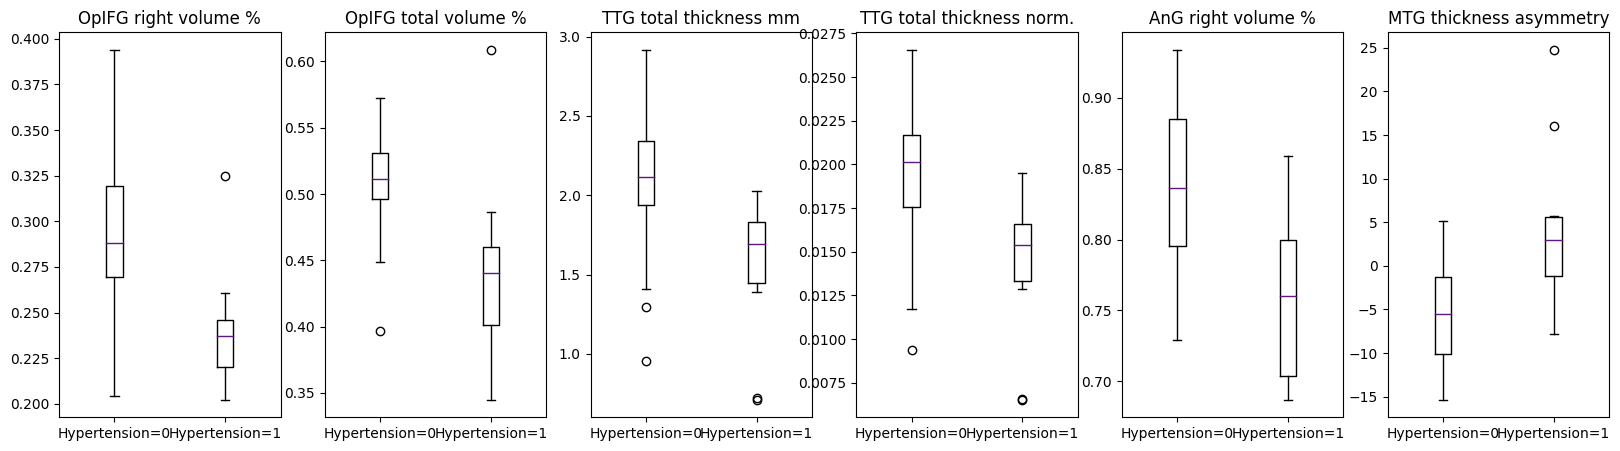

In [28]:
import matplotlib.pyplot as plt
from scipy.stats import ranksums

# Define the columns of interest
neuro_scores_cols = [
    'Event_CVA',
    'Event_Mood abnormalities (depressive)',
    'Event_Mood abnormalities (mixed)',
    'Event_Movement Disorder',
    'Event_Psychosis',
    'Event_Seizure',
    'Event_Seizure, ACS, myelitis, CVA',
    'Event_nan'
]
prednisone_col = 'Prednisone  (mg equivalent)'  # Fixed the variable name
antibodies_cols = ['AnAb ','aPL+', 'anti-dsDNA Titre  (insert NV here <7 )', 'Anti-Ro-SSA', 'Anti-La-SSB', 'Anti-RNP','anti-Sm','Anti-Rib-P', 'Anti-DWEYS']
risk_factors_cols = list(df.columns[35:42])  # Convert to list
slicc_col = 'SLICC-DI (at the time of NP event)'
sledai_col = 'SLEDAI-2k (at the time of NP event)'
brain_region_cols = list(df.columns[44:937])  # Convert to list

# Assign groups based on Hypertension score
group1 = df[df['Hypertension'] == 0]
group2 = df[df['Hypertension'] == 1]

# Perform the Wilcoxon rank-sum test for all continuous variables among groups
significant_vars = []
p_values = []

# Fixed the loop condition and added brain region cols
for col in neuro_scores_cols + [prednisone_col] + antibodies_cols + risk_factors_cols + [slicc_col] + [sledai_col] + brain_region_cols:
    pval = ranksums(group1[col], group2[col])[1]
    if pval < 0.05:
        significant_vars.append(col)
        p_values.append(pval)
        print(f"{col}: p-value = {pval:.4f}")

# Sort the significant variables by p-value
sorted_vars = [x for _, x in sorted(zip(p_values, significant_vars))]

# Plot the five most significant variables
fig, axs = plt.subplots(1, 6, figsize=(20, 5))
for i in range(6):
    col = sorted_vars[i]
    axs[i].boxplot([group1[col], group2[col]])
    axs[i].set_xticklabels(['Hypertension=0', 'Hypertension=1'])
    axs[i].set_title(col)

# Save the figure to the results folder as a PNG file
plt.savefig(f'/Users/Sebastiano/SLE/results/Wilcoxon.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close(fig)


SLICC-DI (at the time of NP event): p-value = 0.0328
Cerebrum GM volume asymmetry: p-value = 0.0396
STG volume asymmetry: p-value = 0.0350
PHG total volume cm3: p-value = 0.0449
PHG left volume cm3: p-value = 0.0236
FO left volume %: p-value = 0.0449
OrIFG thickness asymmetry: p-value = 0.0396
PT right thickness mm: p-value = 0.0350
PT right thickness norm.: p-value = 0.0396


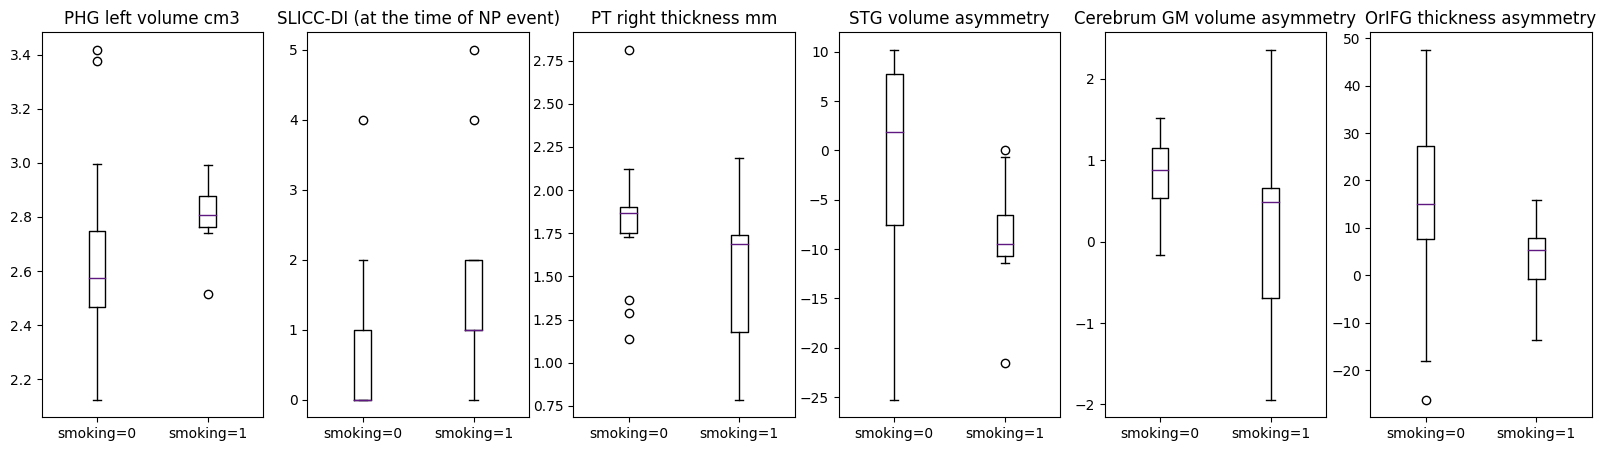

In [29]:
import matplotlib.pyplot as plt
from scipy.stats import ranksums

# Define the columns of interest
neuro_scores_cols = [
    'Event_CVA',
    'Event_Mood abnormalities (depressive)',
    'Event_Mood abnormalities (mixed)',
    'Event_Movement Disorder',
    'Event_Psychosis',
    'Event_Seizure',
    'Event_Seizure, ACS, myelitis, CVA',
    'Event_nan'
]
prednisone_col = 'Prednisone  (mg equivalent)'  # Fixed the variable name
antibodies_cols = ['AnAb ','aPL+', 'anti-dsDNA Titre  (insert NV here <7 )', 'Anti-Ro-SSA', 'Anti-La-SSB', 'Anti-RNP','anti-Sm','Anti-Rib-P', 'Anti-DWEYS']
risk_factors_cols = list(df.columns[35:42])  # Convert to list
slicc_col = 'SLICC-DI (at the time of NP event)'
sledai_col = 'SLEDAI-2k (at the time of NP event)'
brain_region_cols = list(df.columns[44:937])  # Convert to list

# Assign groups based on smoking score
group1 = df[df['ever smoking'] == 0]
group2 = df[df['ever smoking'] == 1]

# Perform the Wilcoxon rank-sum test for all continuous variables among groups
significant_vars = []
p_values = []

# Fixed the loop condition and added brain region cols
for col in neuro_scores_cols + [prednisone_col] + antibodies_cols + risk_factors_cols + [slicc_col] + [sledai_col] + brain_region_cols:
    pval = ranksums(group1[col], group2[col])[1]
    if pval < 0.05:
        significant_vars.append(col)
        p_values.append(pval)
        print(f"{col}: p-value = {pval:.4f}")

# Sort the significant variables by p-value
sorted_vars = [x for _, x in sorted(zip(p_values, significant_vars))]

# Plot the five most significant variables
fig, axs = plt.subplots(1, 6, figsize=(20, 5))
for i in range(6):
    col = sorted_vars[i]
    axs[i].boxplot([group1[col], group2[col]])
    axs[i].set_xticklabels(['smoking=0', 'smoking=1'])
    axs[i].set_title(col)

# Save the figure to the results folder as a PNG file
plt.savefig(f'/Users/Sebastiano/SLE/results/Wilcoxon.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close(fig)


Abnormal Appearing White Matter volume cm3: p-value = 0.006332
Abnormal Appearing White Matter volume %: p-value = 0.006332
Grey Matter (GM) volume %: p-value = 0.016902
SLICC-DI (at the time of NP event): p-value = 0.026541
Cerebro Spinal Fluid (CSF) volume cm3: p-value = 0.047780
Cerebrum GM total volume %: p-value = 0.034360
Cerebrum GM right volume %: p-value = 0.040602
Cerebrum GM left volume %: p-value = 0.028957
Vermis volume %: p-value = 0.024302
Accumbens total volume cm3: p-value = 0.047780
Accumbens total volume %: p-value = 0.024302
Accumbens right volume %: p-value = 0.028957
Accumbens left volume %: p-value = 0.047780
Accumbens volume asymmetry: p-value = 0.028957
Amygdala total volume cm3: p-value = 0.020310
Amygdala total volume %: p-value = 0.040602
Amygdala left volume cm3: p-value = 0.024302
Amygdala left volume %: p-value = 0.047780
Thalamus total volume %: p-value = 0.014007
Thalamus right volume %: p-value = 0.011559
Thalamus left volume %: p-value = 0.020310
OpIF

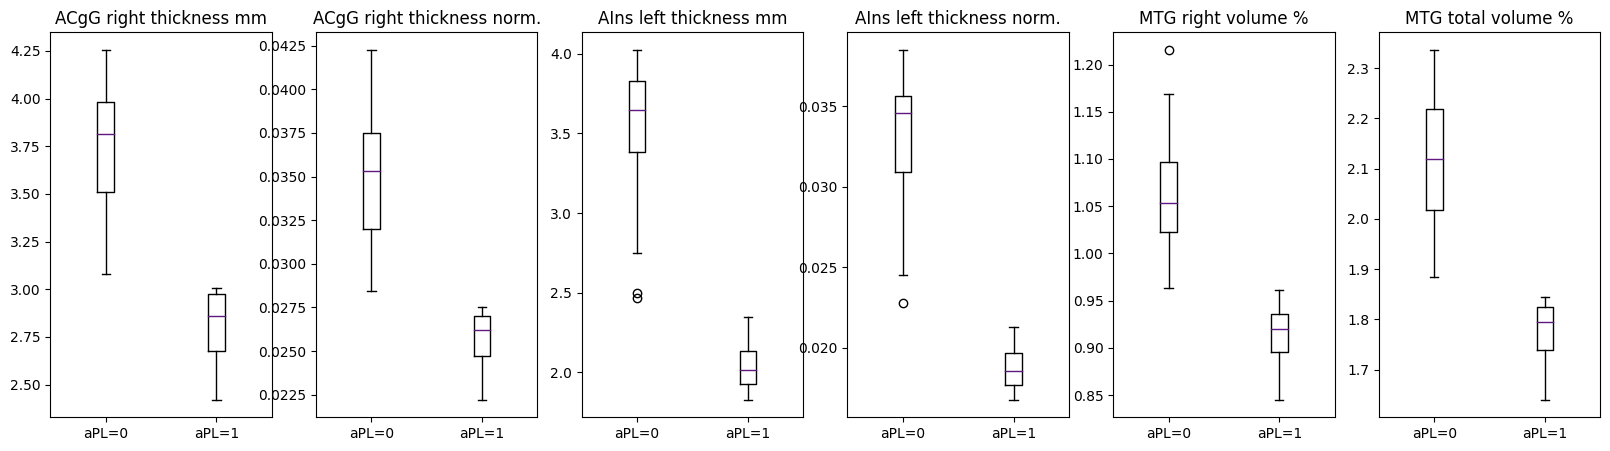

In [8]:
import matplotlib.pyplot as plt
from scipy.stats import ranksums

# Define the columns of interest
neuro_scores_cols = [
    'Event_CVA',
    'Event_Mood abnormalities (depressive)',
    'Event_Mood abnormalities (mixed)',
    'Event_Movement Disorder',
    'Event_Psychosis',
    'Event_Seizure',
    'Event_Seizure, ACS, myelitis, CVA',
    'Event_nan'
]
prednisone_col = 'Prednisone  (mg equivalent)'  # Fixed the variable name
antibodies_cols = ['AnAb ','aPL+', 'anti-dsDNA Titre  (insert NV here <7 )', 'Anti-Ro-SSA', 'Anti-La-SSB', 'Anti-RNP','anti-Sm','Anti-Rib-P', 'Anti-DWEYS']
risk_factors_cols = list(df.columns[35:42])  # Convert to list
slicc_col = 'SLICC-DI (at the time of NP event)'
sledai_col = 'SLEDAI-2k (at the time of NP event)'
brain_region_cols = list(df.columns[44:937])  # Convert to list

# Assign groups based on aCL IgG score
group1 = df[df['aPL syndrome'] == 0]
group2 = df[df['aPL syndrome'] == 1]

# Perform the Wilcoxon rank-sum test for all continuous variables among groups
significant_vars = []
p_values = []

# Fixed the loop condition and added brain region cols
for col in neuro_scores_cols + [prednisone_col] + antibodies_cols + risk_factors_cols + [slicc_col] + [sledai_col] + brain_region_cols:
    pval = ranksums(group1[col], group2[col])[1]
    if pval < 0.05:
        significant_vars.append(col)
        p_values.append(pval)
        print(f"{col}: p-value = {pval:.6f}")

# Sort the significant variables by p-value
sorted_vars = [x for _, x in sorted(zip(p_values, significant_vars))]

# Plot the five most significant variables
fig, axs = plt.subplots(1, 6, figsize=(20, 5))
for i in range(6):
    col = sorted_vars[i]
    axs[i].boxplot([group1[col], group2[col]])
    axs[i].set_xticklabels(['aPL=0', 'aPL=1'])
    axs[i].set_title(col)

# Save the figure to the results folder as a PNG file
plt.savefig(f'/Users/Sebastiano/SLE/results/Wilcoxon.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close(fig)


SLEDAI-2k (at the time of NP event): p-value = 0.0087
Cerebellum volume asymmetry: p-value = 0.0350
PP volume asymmetry: p-value = 0.0449
TTG volume asymmetry: p-value = 0.0350
Calc total volume %: p-value = 0.0206
Calc right volume %: p-value = 0.0156
IOG total volume %: p-value = 0.0075
IOG right volume cm3: p-value = 0.0270
IOG right volume %: p-value = 0.0075
IOG volume asymmetry: p-value = 0.0206
MOG right volume %: p-value = 0.0449
MOG volume asymmetry: p-value = 0.0136
SOG total volume %: p-value = 0.0396
MCgG right volume cm3: p-value = 0.0308
MPrG total thickness mm: p-value = 0.0396
PCu total thickness mm: p-value = 0.0136
PCu total thickness norm.: p-value = 0.0087
PCu right thickness mm: p-value = 0.0206
PCu right thickness norm.: p-value = 0.0449
PCu left thickness mm: p-value = 0.0087
PCu left thickness norm.: p-value = 0.0064
Cun total thickness mm: p-value = 0.0270
Cun total thickness norm.: p-value = 0.0206
Cun left thickness mm: p-value = 0.0156
Cun left thickness nor

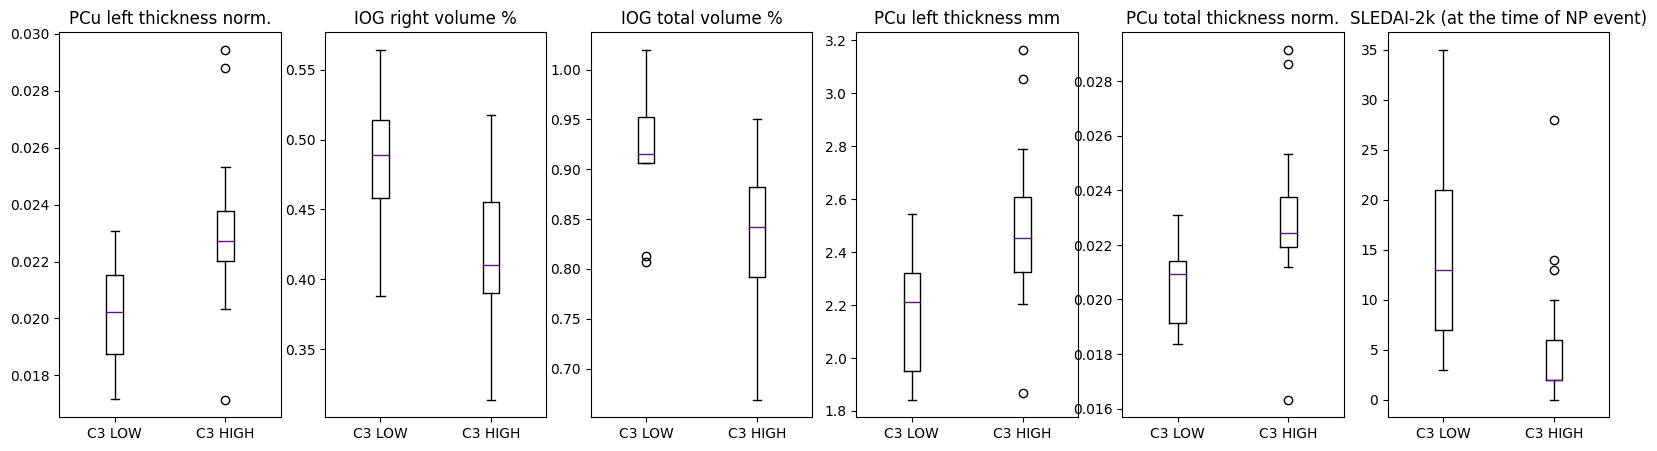

In [7]:
import matplotlib.pyplot as plt
from scipy.stats import ranksums

# Define the columns of interest
neuro_scores_cols = [
    'Event_CVA',
    'Event_Mood abnormalities (depressive)',
    'Event_Mood abnormalities (mixed)',
    'Event_Movement Disorder',
    'Event_Psychosis',
    'Event_Seizure',
    'Event_Seizure, ACS, myelitis, CVA',
    'Event_nan'
]
prednisone_col = 'Prednisone  (mg equivalent)'
antibodies_cols = ['AnAb ','aPL+', 'anti-dsDNA Titre  (insert NV here <7 )', 'Anti-Ro-SSA', 'Anti-La-SSB', 'Anti-RNP','anti-Sm','Anti-Rib-P', 'Anti-DWEYS']
risk_factors_cols = list(df.columns[35:42])
slicc_col = 'SLICC-DI (at the time of NP event)'
sledai_col = 'SLEDAI-2k (at the time of NP event)'
brain_region_cols = list(df.columns[44:937])

# Assign groups based on C3 levels
group1 = df[df['C3 (mgdl)'] < 80]
group2 = df[df['C3 (mgdl)'] >= 80]

# Perform the Wilcoxon rank-sum test for all continuous variables among the groups
significant_vars = []
p_values = []

for col in neuro_scores_cols + [prednisone_col] + antibodies_cols + risk_factors_cols + [sledai_col] + brain_region_cols:
    pval = ranksums(group1[col], group2[col])[1]
    if pval < 0.05:
        significant_vars.append(col)
        p_values.append(pval)
        print(f"{col}: p-value = {pval:.4f}")

# Sort the significant variables by p-value
sorted_vars = [x for _, x in sorted(zip(p_values, significant_vars))]

# Plot the five most significant variables
fig, axs = plt.subplots(1, 6, figsize=(20, 5))
for i in range(6):
    col = sorted_vars[i]
    axs[i].boxplot([group1[col], group2[col]])
    axs[i].set_xticklabels(['C3 LOW', 'C3 HIGH'])
    axs[i].set_title(col)

# Save the figure to a PNG file
#plt.savefig('/path/to/results/Wilcoxon.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close(fig)

## Fisher’s exact to compare categorical variables among groups

In [5]:
from scipy.stats import fisher_exact

# Select the two variables to compare
var_1 = df['NP-SLE']
var_2 = df['AnAb ']

# Bin variables into two categories
#var1_bins = pd.cut(var1, bins=[-1, 1.5, 2], labels=['No_NP', 'Yes_NP'])
#var2_bins = pd.cut(var2, bins=[-1, 1.5, 2], labels=['AnAb_0', 'AnAb_1'])

n_var_1 = var_1.to_numpy()
n_var_2 = var_2.to_numpy()

# Create the contingency table

contingency_table = pd.crosstab(n_var_1, n_var_2, margins=False)

# Perform the Fisher's exact test
odds_ratio, p_value = fisher_exact(contingency_table)

# Print results
print(f"Odds ratio: {odds_ratio:.2f}")
print(f"P-value: {p_value:.4f}")

Odds ratio: 7.00
P-value: 0.0461


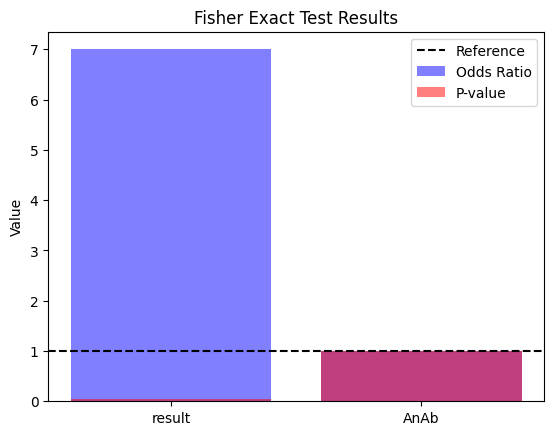

In [48]:
# Plot results
# Create a bar chart to display odds ratio and p-value
plt.bar(['NP-SLE', 'AnAb'], [odds_ratio, 1], color='blue', alpha=0.5)
plt.bar(['NP-SLE', 'AnAb'], [p_value, 1], color='red', alpha=0.5)

# Add a reference line at y=1
plt.axhline(y=1, color='black', linestyle='--')

# Set the y-axis label and chart title
plt.ylabel('Value')
plt.title('Fisher Exact Test Results')

# Add a legend
plt.legend(['Reference', 'Odds Ratio', 'P-value'])

# Display the chart
plt.show()

In [8]:
from scipy.stats import fisher_exact

# Select the two variables to compare
var_1 = df['NP-SLE']
var_2 = df['aPL+']

# Bin variables into two categories
#var1_bins = pd.cut(var1, bins=[-1, 1.5, 2], labels=['No_NP', 'Yes_NP'])
#var2_bins = pd.cut(var2, bins=[-1, 1.5, 2], labels=['AnAb_0', 'AnAb_1'])

n_var_1 = var_1.to_numpy()
n_var_2 = var_2.to_numpy()

# Create the contingency table

contingency_table = pd.crosstab(n_var_1, n_var_2, margins=False)

# Perform the Fisher's exact test
odds_ratio, p_value = fisher_exact(contingency_table)

# Print results
print(f"Odds ratio: {odds_ratio:.2f}")
print(f"P-value: {p_value:.4f}")

Odds ratio: 0.33
P-value: 0.2519


In [6]:
from scipy.stats import fisher_exact

# Select the two variables to compare
var_1 = df['NP-SLE']
var_2 = df['LAC']

# Bin variables into two categories
#var1_bins = pd.cut(var1, bins=[-1, 1.5, 2], labels=['No_NP', 'Yes_NP'])
#var2_bins = pd.cut(var2, bins=[-1, 1.5, 2], labels=['AnAb_0', 'AnAb_1'])

n_var_1 = var_1.to_numpy()
n_var_2 = var_2.to_numpy()

# Create the contingency table

contingency_table = pd.crosstab(n_var_1, n_var_2, margins=False)

# Perform the Fisher's exact test
odds_ratio, p_value = fisher_exact(contingency_table)

# Print results
print(f"Odds ratio: {odds_ratio:.2f}")
print(f"P-value: {p_value:.4f}")

Odds ratio: 0.48
P-value: 0.4495


In [7]:
from scipy.stats import fisher_exact

# Select the two variables to compare
var_1 = df['NP-SLE']
var_2 = df['aCL IgG']

# Bin variables into two categories
#var1_bins = pd.cut(var1, bins=[-1, 1.5, 2], labels=['No_NP', 'Yes_NP'])
#var2_bins = pd.cut(var2, bins=[-1, 1.5, 2], labels=['AnAb_0', 'AnAb_1'])

n_var_1 = var_1.to_numpy()
n_var_2 = var_2.to_numpy()

# Create the contingency table

contingency_table = pd.crosstab(n_var_1, n_var_2, margins=False)

# Perform the Fisher's exact test
odds_ratio, p_value = fisher_exact(contingency_table)

# Print results
print(f"Odds ratio: {odds_ratio:.2f}")
print(f"P-value: {p_value:.4f}")

Odds ratio: 1.85
P-value: 0.6776


In [5]:
from scipy.stats import fisher_exact

# Select the two variables to compare
var_1 = df['NP-SLE']
var_2 = df['aCL IgM']

# Bin variables into two categories
#var1_bins = pd.cut(var1, bins=[-1, 1.5, 2], labels=['No_NP', 'Yes_NP'])
#var2_bins = pd.cut(var2, bins=[-1, 1.5, 2], labels=['AnAb_0', 'AnAb_1'])

n_var_1 = var_1.to_numpy()
n_var_2 = var_2.to_numpy()

# Create the contingency table

contingency_table = pd.crosstab(n_var_1, n_var_2, margins=False)

# Perform the Fisher's exact test
odds_ratio, p_value = fisher_exact(contingency_table)

# Print results
print(f"Odds ratio: {odds_ratio:.2f}")
print(f"P-value: {p_value:.4f}")

Odds ratio: 0.38
P-value: 0.3845


In [6]:
from scipy.stats import fisher_exact

# Select the two variables to compare
var_1 = df['NP-SLE']
var_2 = df['anti-Sm']

# Bin variables into two categories
#var1_bins = pd.cut(var1, bins=[-1, 1.5, 2], labels=['No_NP', 'Yes_NP'])
#var2_bins = pd.cut(var2, bins=[-1, 1.5, 2], labels=['AnAb_0', 'AnAb_1'])

n_var_1 = var_1.to_numpy()
n_var_2 = var_2.to_numpy()

# Create the contingency table

contingency_table = pd.crosstab(n_var_1, n_var_2, margins=False)

# Perform the Fisher's exact test
odds_ratio, p_value = fisher_exact(contingency_table)

# Print results
print(f"Odds ratio: {odds_ratio:.2f}")
print(f"P-value: {p_value:.4f}")

Odds ratio: 0.90
P-value: 1.0000


In [9]:
from scipy.stats import fisher_exact

# Select the two variables to compare
var_1 = df['NP-SLE']
var_2 = df['Anti-Rib-P']

# Bin variables into two categories
#var1_bins = pd.cut(var1, bins=[-1, 1.5, 2], labels=['No_NP', 'Yes_NP'])
#var2_bins = pd.cut(var2, bins=[-1, 1.5, 2], labels=['AnAb_0', 'AnAb_1'])

n_var_1 = var_1.to_numpy()
n_var_2 = var_2.to_numpy()

# Create the contingency table

contingency_table = pd.crosstab(n_var_1, n_var_2, margins=False)

# Perform the Fisher's exact test
odds_ratio, p_value = fisher_exact(contingency_table)

# Print results
print(f"Odds ratio: {odds_ratio:.2f}")
print(f"P-value: {p_value:.4f}")

Odds ratio: 9.00
P-value: 0.0768


In [10]:
from scipy.stats import fisher_exact

# Select the two variables to compare
var_1 = df['NP-SLE']
var_2 = df['Hypertension']

# Bin variables into two categories
#var1_bins = pd.cut(var1, bins=[-1, 1.5, 2], labels=['No_NP', 'Yes_NP'])
#var2_bins = pd.cut(var2, bins=[-1, 1.5, 2], labels=['AnAb_0', 'AnAb_1'])

n_var_1 = var_1.to_numpy()
n_var_2 = var_2.to_numpy()

# Create the contingency table

contingency_table = pd.crosstab(n_var_1, n_var_2, margins=False)

# Perform the Fisher's exact test
odds_ratio, p_value = fisher_exact(contingency_table)

# Print results
print(f"Odds ratio: {odds_ratio:.2f}")
print(f"P-value: {p_value:.4f}")

Odds ratio: 1.69
P-value: 0.6946


In [11]:
from scipy.stats import fisher_exact

# Select the two variables to compare
var_1 = df['NP-SLE']
var_2 = df['ever smoking']

# Bin variables into two categories
#var1_bins = pd.cut(var1, bins=[-1, 1.5, 2], labels=['No_NP', 'Yes_NP'])
#var2_bins = pd.cut(var2, bins=[-1, 1.5, 2], labels=['AnAb_0', 'AnAb_1'])

n_var_1 = var_1.to_numpy()
n_var_2 = var_2.to_numpy()

# Create the contingency table

contingency_table = pd.crosstab(n_var_1, n_var_2, margins=False)

# Perform the Fisher's exact test
odds_ratio, p_value = fisher_exact(contingency_table)

# Print results
print(f"Odds ratio: {odds_ratio:.2f}")
print(f"P-value: {p_value:.4f}")

Odds ratio: 2.50
P-value: 0.4197


## Kruskal-Wallis test (equivalent of ANOVA)

Not needed for only two groups

/opt/homebrew/Caskroom/miniforge/base/envs/lupus/lib/python3.10/site-packages/scipy/stats/_morestats.py:1813: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


Inf. Lateral Ventricle left volume %: Kruskal-Wallis test p-value = 0.02898598091688467
SCA left thickness mm: Kruskal-Wallis test p-value = 0.04154006700988525
Temporal thickness asymmetry: Kruskal-Wallis test p-value = 0.04154006700988525
MTG thickness asymmetry: Kruskal-Wallis test p-value = 0.036922061893465294
TMP thickness asymmetry: Kruskal-Wallis test p-value = 0.01011460727458917
AnG right thickness mm: Kruskal-Wallis test p-value = 0.004885056354422506
AnG right thickness norm.: Kruskal-Wallis test p-value = 0.03274867964999203
MOG left thickness mm: Kruskal-Wallis test p-value = 0.03274867964999203
MOG left thickness norm.: Kruskal-Wallis test p-value = 0.04154006700988525


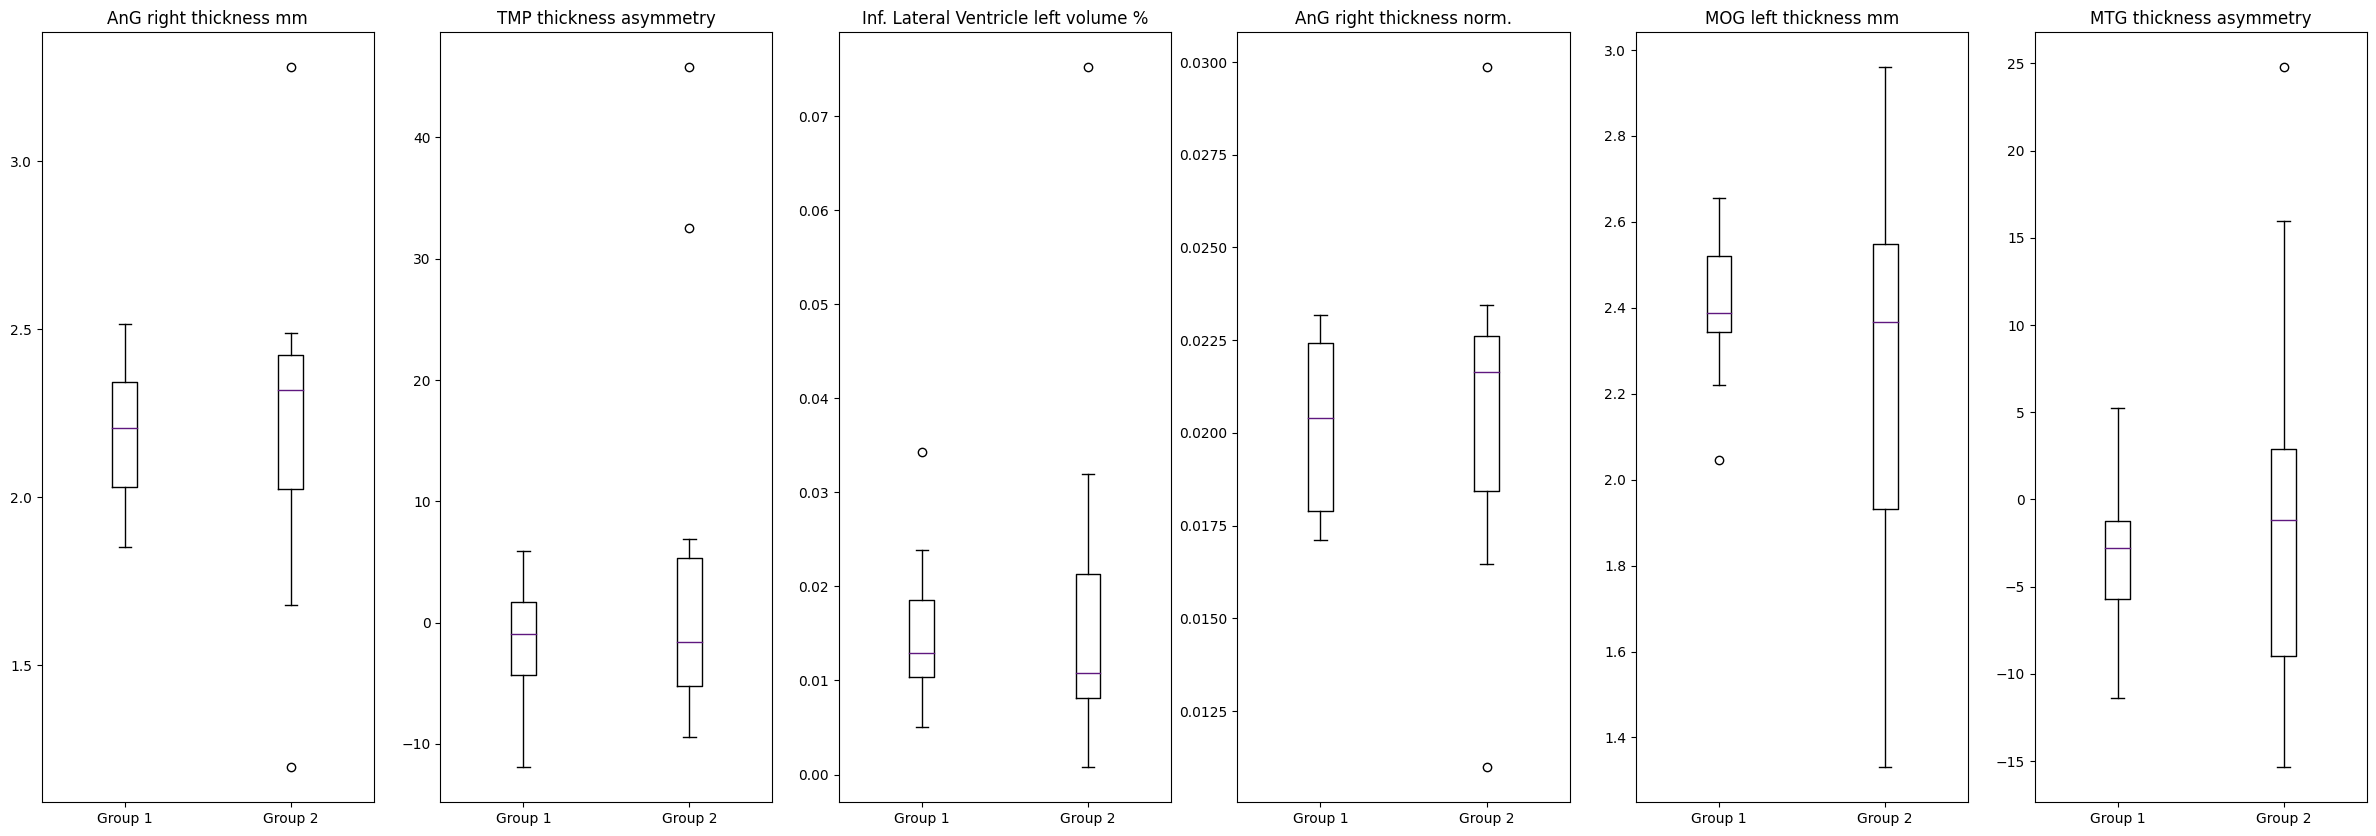

In [19]:
from scipy.stats import shapiro, kruskal

# Identify columns with interval data type 
interval_cols = [col for col in df.columns if pd.api.types.is_interval_dtype(df[col])]

# Handle interval data type
for col in interval_cols:
    df[col] = df[col].apply(lambda x: x.mid)

# Convert variables to float and fill missing values with the mean
df = df.astype(float)
df.fillna(df.mean(), inplace=True)

# Define the columns of interest
neurocog_cols = [
    'Event_CVA',
    'Event_Mood abnormalities (depressive)',
    'Event_Mood abnormalities (mixed)',
    'Event_Movement Disorder',
    'Event_Psychosis',
    'Event_Seizure',
    'Event_Seizure, ACS, myelitis, CVA',
    'Event_nan'
]
prednisone = 'Prednisone  (mg equivalent)'  # Fixed the variable name
antibodies = ['AnAb ', 'anti-dsDNA Titre  (0=absent; 1=present) )']
risk_factors = list(df.columns[35:42])  # Convert to list
slicc = 'SLICC-DI (at the time of NP event)'
sledai = 'SLEDAI-2k (at the time of NP event)'
brain_regions = list(df.columns[44:937])  # Convert to list

# Test for normality and perform Kruskal-Wallis test if normality is rejected
kruskal_results = {}
for var in df.columns:
    if var in [neurocog_cols + [prednisone, sledai, slicc, antibodies, risk_factors]] + brain_regions:
        # Test for normality
        shapiro_pvalue = shapiro(df[var])[1]
        if shapiro_pvalue < 0.05:
            # Perform Kruskal-Wallis test if normality is rejected
            kruskal_pvalue = kruskal(df[df['NP-SLE'] == 0][var], df[df['NP-SLE'] == 1][var])[1]
            if kruskal_pvalue < 0.05:
                kruskal_results[var] = kruskal_pvalue
                
# Print the variables that show significant differences between groups
for var, p_value in kruskal_results.items():
    print(f"{var}: Kruskal-Wallis test p-value = {p_value}")

# Sort the significant variables by p-value
sorted_vars = sorted(kruskal_results, key=kruskal_results.get)[:6]
# Plot the five most significant variables
fig, axs = plt.subplots (1, 6, figsize= (30, 10))
for i in range (6):
    col = sorted_vars[i]
    axs[i].boxplot([group1[col], group2[col]])
    axs[i].set_xticklabels(['Group 1','Group 2'])
    axs[i].set_title(col)
# Save the figure to the results folder as a PNG file
plt.savefig(f'/Users/Sebastiano/SLE/results/Kruskal.png', dpi=300, bbox_inches='tight')
plt.show()  
plt.close(fig)

# Parametric Tests

## T-Test

In [11]:
from scipy.stats import ttest_ind

# Select the columns you want to test
columns_to_test = ['C3 (mgdl)', 'Abnormal Appearing White Matter volume cm3', 'Disease duration (months)', 'Intracranial Cavity (IC) volume cm3']

# Conduct the hypothesis tests
p_values = {}
for column in columns_to_test:
    group_1 = df[df['NP-SLE'] == 1][column]  # Data for group 1 (NP-SLE = 1)
    group_0 = df[df['NP-SLE'] == 0][column]  # Data for group 0 (NP-SLE = 0)
    t_statistic, p_value = ttest_ind(group_1, group_0)
    p_values[column] = p_value

# Print the p-values
print(p_values)

{'C3 (mgdl)': 0.9385069595492381, 'Abnormal Appearing White Matter volume cm3': 0.4333915607531764, 'Disease duration (months)': 0.5021901473695648, 'Intracranial Cavity (IC) volume cm3': 0.6165783429417853}


In [12]:
from statsmodels.sandbox.stats.multicomp import multipletests

# Apply the Holm-Bonferroni correction
_, p_values_corrected, _, _ = multipletests(list(p_values.values()), method='holm')

# Print the corrected p-values
print(p_values_corrected)

[1. 1. 1. 1.]


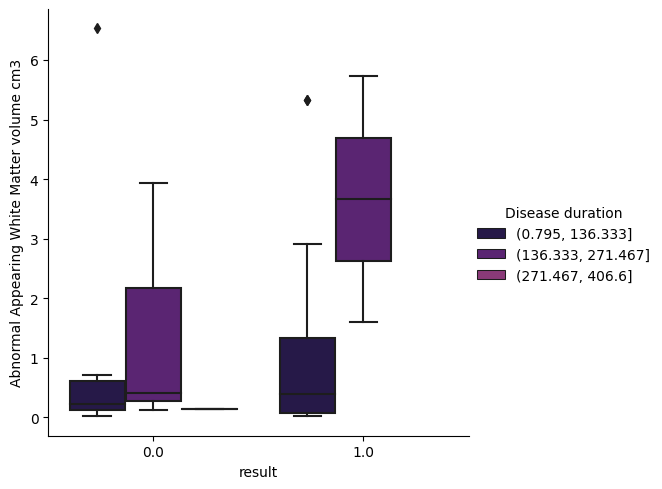

In [27]:
# Plot stats
df['Disease duration'] = pd.cut(df['Disease duration (months)'], bins=3)

sns.catplot(x='result', y='Abnormal Appearing White Matter volume cm3', hue='Disease duration',data=df, kind='box')
# Save the figure to the results folder as a PNG file
plt.savefig(f'/Users/Sebastiano/SLE/results/T_test_white_duration_NP.png', dpi=300, bbox_inches='tight')
plt.show()  
plt.close(fig)

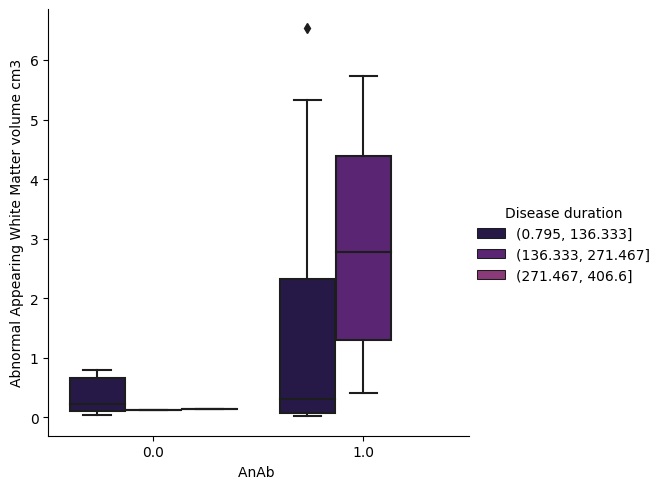

In [28]:
df['Disease duration'] = pd.cut(df['Disease duration (months)'], bins=3)

sns.catplot(x='AnAb ', y='Abnormal Appearing White Matter volume cm3', hue='Disease duration',data=df, kind='box')
# Save the figure to the results folder as a PNG file
plt.savefig(f'/Users/Sebastiano/SLE/results/T_test_white_duration_AnAb.png', dpi=300, bbox_inches='tight')
plt.show()  
plt.close(fig)

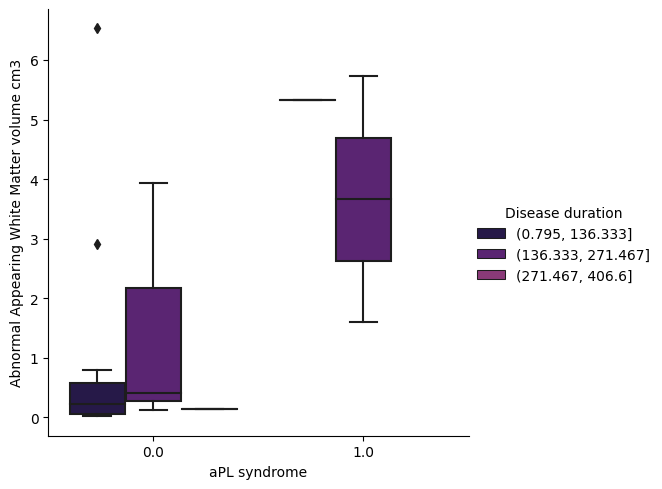

In [29]:
df['Disease duration'] = pd.cut(df['Disease duration (months)'], bins=3)

sns.catplot(x='aPL syndrome', y='Abnormal Appearing White Matter volume cm3', hue='Disease duration',data=df, kind='box')
# Save the figure to the results folder as a PNG file
plt.savefig(f'/Users/Sebastiano/SLE/results/T_test_white_duration_aPL.png', dpi=300, bbox_inches='tight')
plt.show()  
plt.close(fig)

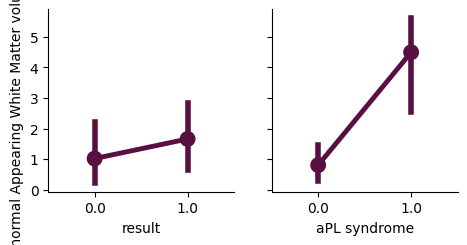

In [30]:
g = sns.PairGrid(df, y_vars='Abnormal Appearing White Matter volume cm3',x_vars=['result','aPL syndrome'])
g.map(sns.pointplot, scale=1.3, errwidth=4, color='xkcd:plum')
# Save the figure to the results folder as a PNG file
plt.savefig(f'/Users/Sebastiano/SLE/results/T_test_white_aPL_NP.png', dpi=300, bbox_inches='tight')
plt.show()  
plt.close(fig)

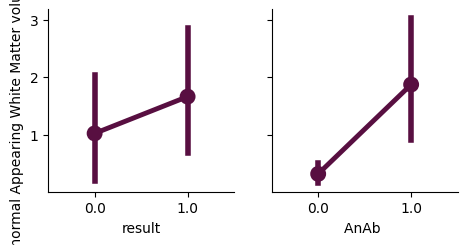

In [31]:
g = sns.PairGrid(df, y_vars='Abnormal Appearing White Matter volume cm3',x_vars=['result','AnAb '])
g.map(sns.pointplot, scale=1.3, errwidth=4, color='xkcd:plum')
# Save the figure to the results folder as a PNG file
plt.savefig(f'/Users/Sebastiano/SLE/results/T_test_white_AnAb_NP.png', dpi=300, bbox_inches='tight')
plt.show()  
plt.close(fig)

In [37]:
# Define the columns to test
columns_to_test = df.columns[56:937]

# Create an empty dataframe to store the t-test results
#t_test_results = pd.DataFrame(columns=['Variable', 'T-statistic', 'p-value'])

relevant_columns = []

## Iterate over the columns
for column in columns_to_test:
    # Check if the column contains only numeric data
    if np.issubdtype(df[column].dtype, np.number):
        # Select the data for the two groups
        group1 = df[df['NP-SLE'] == 0][column]
        group2 = df[df['NP-SLE'] == 1][column]

        # Perform a t-test
        t_stat, p_val = stats.ttest_ind(group1, group2, equal_var=True)

        # Print the results
        # Check if the p-value is below the significance level
        if p_val < 0.05:
            # Add the column to the list of relevant columns
            relevant_columns.append(column)
            print(f"Column: {column}, T-statistic: {t_stat:.3f}, p-value: {p_val:.5f}")
            
# Print the final list of relevant columns
print(f"Statistically significant: {relevant_columns}")
# Sort the significant variables by p-value
sorted_vars = [x for _, x in sorted(zip (p_values, significant_vars))]
# Plot the five most significant variables
fig, axs = plt.subplots (1, 6, figsize= (20, 5))
for i in range (6):
    col = sorted_vars[i]
    axs[i].boxplot([group1[col], group2[col]])
    axs[i].set_xticklabels(['Group 1','Group 2'])
    axs[i].set_title(col)
# Save the figure to the results folder as a PNG file
plt.savefig(f'/Users/Sebastiano/SLE/results/Wilcoxon.png', dpi=300, bbox_inches='tight')
plt.show()  
plt.close(fig)

Column: Amygdala total volume %, T-statistic: -2.096, p-value: 0.04633
Column: Amygdala right volume %, T-statistic: -2.603, p-value: 0.01532
Column: OpIFG total volume cm3, T-statistic: 2.703, p-value: 0.01218
Column: OpIFG total volume %, T-statistic: 2.449, p-value: 0.02170
Column: OpIFG left volume cm3, T-statistic: 2.362, p-value: 0.02629
Column: OpIFG left volume %, T-statistic: 2.198, p-value: 0.03740
Column: MFC left volume %, T-statistic: 2.142, p-value: 0.04215
Column: SMC volume asymmetry, T-statistic: 2.833, p-value: 0.00898
Column: PT left volume %, T-statistic: -2.200, p-value: 0.03729
Column: TTG total volume cm3, T-statistic: 2.093, p-value: 0.04668
Column: TTG right volume cm3, T-statistic: 2.559, p-value: 0.01692
Column: TTG right volume %, T-statistic: 2.263, p-value: 0.03258
Column: Parietal volume asymmetry, T-statistic: 2.310, p-value: 0.02943
Column: Occipital total volume %, T-statistic: 2.492, p-value: 0.01970
Column: Occipital left volume cm3, T-statistic: 2.1

## F-Distribution

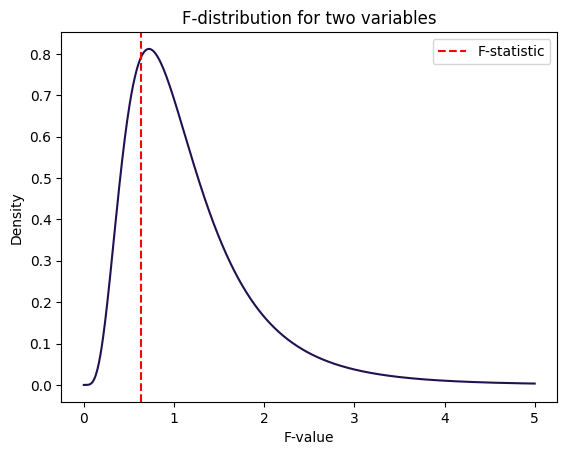

In [31]:
# Calculate F-statistic using stats.f_oneway
F, p = stats.f_oneway(df[df['NP-SLE']==0]['Abnormal Appearing White Matter volume cm3'],
                      df[df['NP-SLE']==1]['Abnormal Appearing White Matter volume cm3'])

# Define degrees of freedom
dfn = len(df[df['NP-SLE']==0]['Abnormal Appearing White Matter volume cm3']) - 1
dfd = len(df[df['NP-SLE']==1]['Abnormal Appearing White Matter volume cm3']) - 1

# Define x range for plotting
x = np.linspace(0, 5, 1000)

# Calculate F-distribution for given degrees of freedom
y = stats.f.pdf(x, dfn, dfd)

# Plot F-distribution
plt.plot(x, y)
plt.xlabel('F-value')
plt.ylabel('Density')
plt.title('F-distribution for two variables')
plt.axvline(F, color='r', linestyle='--', label='F-statistic')
plt.legend()
# Save the figure to the results folder as a PNG file
plt.savefig(f'/Users/Sebastiano/SLE/results/F_dist_NP_White.png', dpi=300, bbox_inches='tight')
plt.show()  
plt.close()

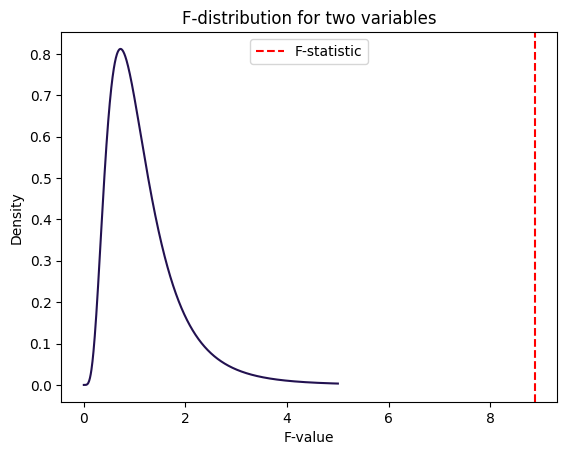

In [33]:
# Calculate F-statistic using stats.f_oneway
F, p = stats.f_oneway(df[df['NP-SLE']==0]['SCA thickness asymmetry'],
                      df[df['NP-SLE']==1]['SCA thickness asymmetry'])

# Define degrees of freedom
dfn = len(df[df['NP-SLE']==0]['SCA thickness asymmetry']) - 1
dfd = len(df[df['NP-SLE']==1]['SCA thickness asymmetry']) - 1

# Define x range for plotting
x = np.linspace(0, 5, 1000)

# Calculate F-distribution for given degrees of freedom
y = stats.f.pdf(x, dfn, dfd)

# Plot F-distribution
plt.plot(x, y)
plt.xlabel('F-value')
plt.ylabel('Density')
plt.title('F-distribution for two variables')
plt.axvline(F, color='r', linestyle='--', label='F-statistic')
plt.legend()
# Save the figure to the results folder as a PNG file
plt.savefig(f'/Users/Sebastiano/SLE/results/F_dist_NP_SCA.png', dpi=300, bbox_inches='tight')
plt.show()  
plt.close()

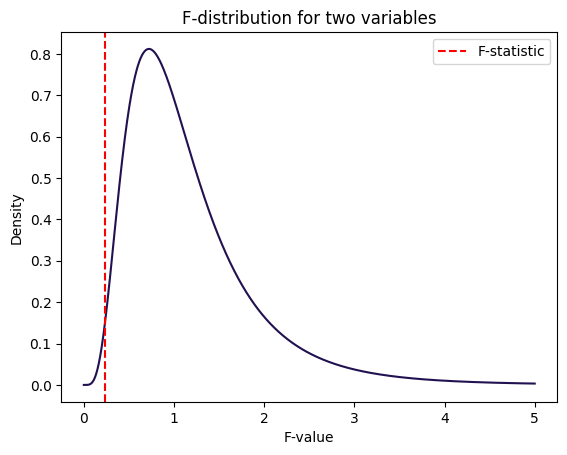

In [10]:
# Calculate F-statistic using stats.f_oneway
F, p = stats.f_oneway(df[df['NP-SLE']==0]['FuG right volume cm3'],
                      df[df['NP-SLE']==1]['FuG right volume cm3'])

# Define degrees of freedom
dfn = len(df[df['NP-SLE']==0]['FuG right volume cm3']) - 1
dfd = len(df[df['NP-SLE']==1]['FuG right volume cm3']) - 1

# Define x range for plotting
x = np.linspace(0, 5, 1000)

# Calculate F-distribution for given degrees of freedom
y = stats.f.pdf(x, dfn, dfd)

# Plot F-distribution
plt.plot(x, y)
plt.xlabel('F-value')
plt.ylabel('Density')
plt.title('F-distribution for two variables')
plt.axvline(F, color='r', linestyle='--', label='F-statistic')
plt.legend()
# Save the figure to the results folder as a PNG file
plt.savefig(f'/Users/Sebastiano/SLE/results/F_dist_NP_SCA.png', dpi=300, bbox_inches='tight')
plt.show()  
plt.close()

## Chi Square

Sample size might be too small for it

In [29]:
from scipy.stats import chi2_contingency

# Select the categorical variable to analyze
cat_var = df['aPL syndrome']

# Create a contingency table
cont_table = pd.crosstab(cat_var, df['NP-SLE'])

# Perform the chi-square test
chi2, pval, dof, expected = chi2_contingency(cont_table)

# Print the results
print(f"Chi-square value: {chi2:.2f}")
print(f"P-value: {pval:.4f}")
print(f"Degrees of freedom: {dof}")
print("Expected values:")
print(expected)

Chi-square value: 2.39
P-value: 0.1221
Degrees of freedom: 1
Expected values:
[[11.07407407 11.92592593]
 [ 1.92592593  2.07407407]]


In [30]:
from scipy.stats import chi2_contingency

# Select the categorical variable to analyze
cat_var = df['AnAb ']

# Create a contingency table
cont_table = pd.crosstab(cat_var, df['NP-SLE'])

# Perform the chi-square test
chi2, pval, dof, expected = chi2_contingency(cont_table)

# Print the results
print(f"Chi-square value: {chi2:.2f}")
print(f"P-value: {pval:.4f}")
print(f"Degrees of freedom: {dof}")
print("Expected values:")
print(expected)

Chi-square value: 3.13
P-value: 0.0767
Degrees of freedom: 1
Expected values:
[[4.33333333 4.66666667]
 [8.66666667 9.33333333]]


In [9]:
from scipy.stats import chi2_contingency

# Define the categorical variables of interest
categorical_vars = ['anti-dsDNA Titre  (0=absent; 1=present) )', 'Anti-Ro-SSA', 'Anti-La-SSB', 'Anti-RNP', 'anti-Sm', 'LAC', 'aCL IgG', 'aCL IgM', 'aB2GPI IgG', 'aB2GPI IgM', 'aPL+', 'AnAb ', 'Anti-Rib-P', 'Anti-DWEYS', 'Cutaneous vasculitis', 'Hypertension', 'Hyperlipidaemia', 'current Smoking', 'ever smoking']

# Filter the dataset for NP-SLE = 1 and NP-SLE = 0
group_np_sle_1 = df[df['NP-SLE'] == 1]
group_np_sle_0 = df[df['NP-SLE'] == 0]

# Initialize lists to store significant variables and their p-values
significant_vars = []
p_values = []

# Perform chi-squared test for each categorical variable
for var in categorical_vars:
    contingency_table = pd.crosstab(df[var], df['NP-SLE'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    
    if p < 0.05:
        significant_vars.append(var)
        p_values.append(p)
        print(f"{var}: p-value = {p:.4f}")

# Sort the significant variables by p-value
sorted_vars = [x for _, x in sorted(zip(p_values, significant_vars))]

print("Significant variables:")
print(sorted_vars)

Significant variables:
[]


In [11]:
# Group the data by NP-SLE and compute frequency counts for each categorical variable
grouped_data = df.groupby('NP-SLE')[categorical_vars].apply(lambda x: x.apply(pd.Series.value_counts)).unstack()

# Display the frequency counts for each categorical variable
for var in categorical_vars:
    print(f"\nVariable: {var}")
    print(grouped_data[var])



Variable: anti-dsDNA Titre  (0=absent; 1=present) )
        0   1
NP-SLE       
0       2  11
1       2  12

Variable: Anti-Ro-SSA
        0  1
NP-SLE      
0       7  6
1       7  7

Variable: Anti-La-SSB
         0  1
NP-SLE       
0       12  1
1       13  1

Variable: Anti-RNP
         0  1
NP-SLE       
0        8  5
1       11  3

Variable: anti-Sm
         0  1
NP-SLE       
0        9  4
1       10  4

Variable: LAC
        0  1
NP-SLE      
0       6  7
1       9  5

Variable: aCL IgG
         0  1
NP-SLE       
0       10  3
1        9  5

Variable: aCL IgM
         0  1
NP-SLE       
0        9  4
1       12  2

Variable: aB2GPI IgG
         0  1
NP-SLE       
0       11  2
1       10  4

Variable: aB2GPI IgM
         0  1
NP-SLE       
0       11  2
1       13  1

Variable: aPL+
        0  1
NP-SLE      
0       4  9
1       8  6

Variable: AnAb 
        0   1
NP-SLE       
0       7   6
1       2  12

Variable: Anti-Rib-P
         0  1
NP-SLE       
0       12  1
1       